In [ ]:
'''
8. DataFrame을 활용한 시각화(Appendix)
9. Matplotlib 스타일(Appendix)
10. Matplotlib 그래프(Appendix)
11. Seaborn(appendix)
'''

In [2]:
!pip install mySUNI

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mySUNI import cds
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 한글 폰트 설정
plt.rcParams['font.family'] = "NanumGothic"

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (10, 8)

In [ ]:
'''
1. DataFrame을 활용한 시각화(Appendix)

line: 선그래프: 연속적 데이터

bar: 바 그래프:그룹별 비교
barh: 수평 바 그래프

hist: 히스토그램: 분포-빈도를 시각화
kde: 커널 밀도 그래프: 밀도 그래프로, 부드러운 라인을 가짐
**분포는 데이터의 값들이 어떻게 분포하는지
**밀도: 분포의 형태를 더욱 세밀하게 나타낸 개념, 빈도 대신 확률밀도(면적당 데이터가 출현할 확률)을 이용
보통 히스토그램과 함께 사용되어 분포의 형태를 더 부드럽게 표현함

hexbin: 고밀도 산점도 그래프: x,y 모두 수치형으로 지정해줘야함

box: 박스 플롯: 4분위수 나타낼 수 있음

area: 면적 그래프

pie: 파이 그래프: 원 그래프

scatter: 산점도 그래프: x,y 모두 수치형으로 지정해줘야함
'''

In [4]:
#주택도시보증공사_전국 신규 민간 아파트 분양가격 동향
df = pd.read_csv('https://bit.ly/2Vk0zLr')
df.head()

,지역,규모,연도,월,분양가
0,서울,60㎡이하,2015,10,5652
1,서울,60㎡초과 85㎡이하,2015,10,5882
2,서울,85㎡초과 102㎡이하,2015,10,5721
3,서울,102㎡초과,2015,10,5879
4,인천,60㎡이하,2015,10,3488


<Axes: >

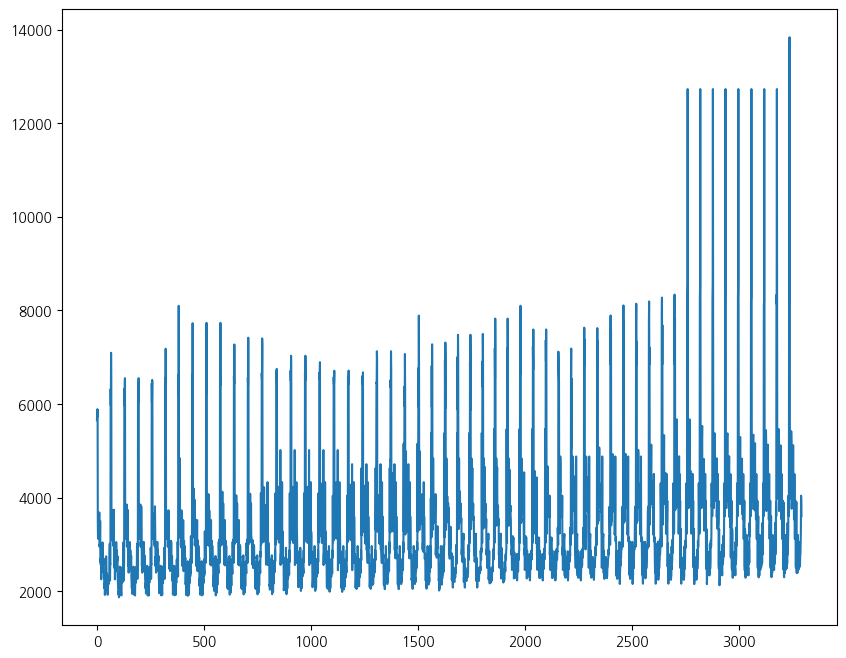

In [5]:
df['분양가'].plot(kind='line')

In [10]:
df_seoul=df.loc[df['지역']=='서울']
df_seoul_year=df_seoul.groupby('연도').mean()
df_seoul_year

,월,분양가
연도,,
2015,11.0,6201.000000
2016,6.5,6674.520833
2017,6.5,6658.729167
2018,6.5,7054.687500
2019,6.5,8735.083333
2020,1.5,9647.375000


<Axes: xlabel='연도'>

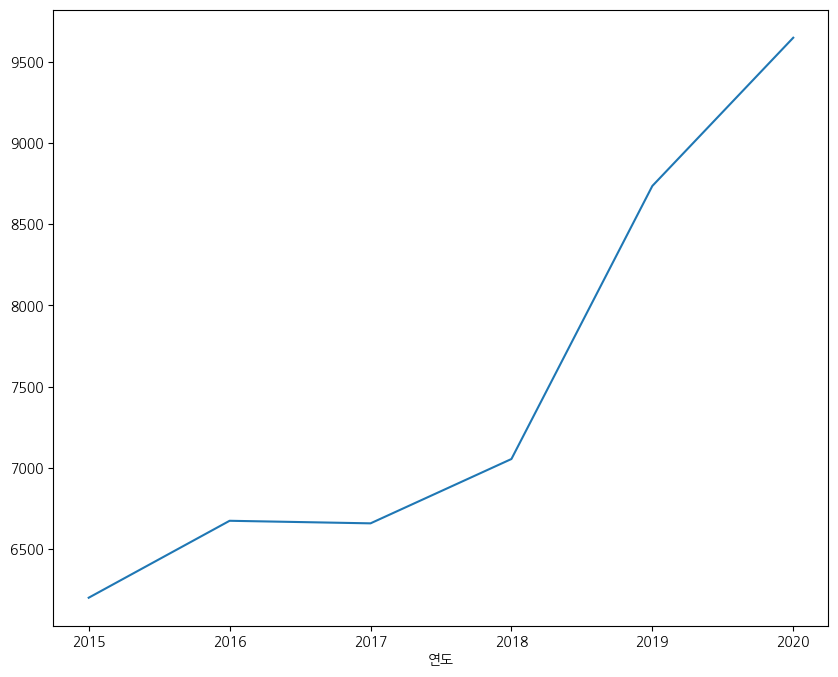

In [20]:
df_seoul_year['분양가'].plot(kind='line')
#분양가는 대체로 우상향하고 있음을 알 수 있음

<Axes: ylabel='지역'>

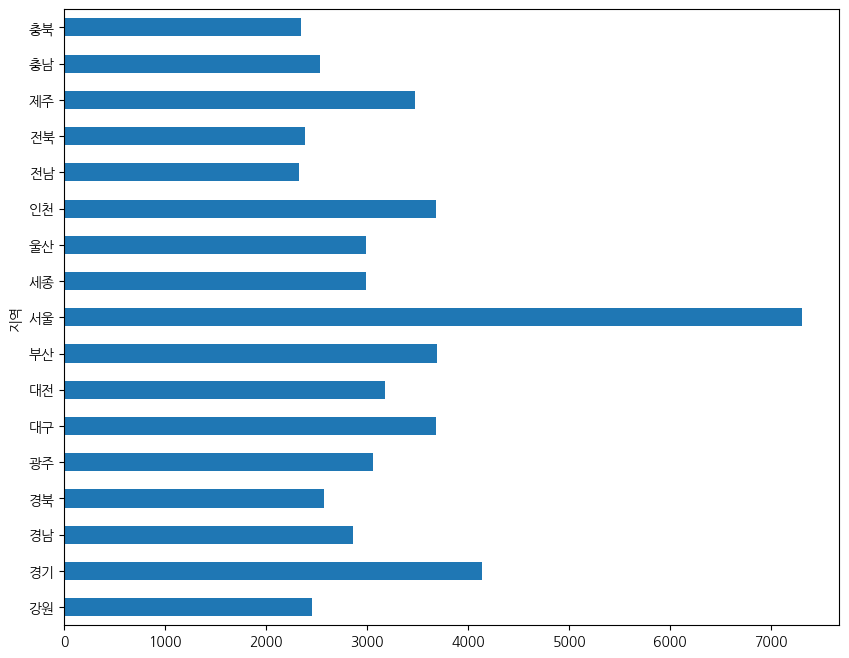

In [15]:
#bar는 가로(w)로, barh는 height기준으로 생성됨
df.groupby('지역')['분양가'].mean().plot(kind='barh')
#서울이 가장 분양가가 비쌈

<Axes: ylabel='Frequency'>

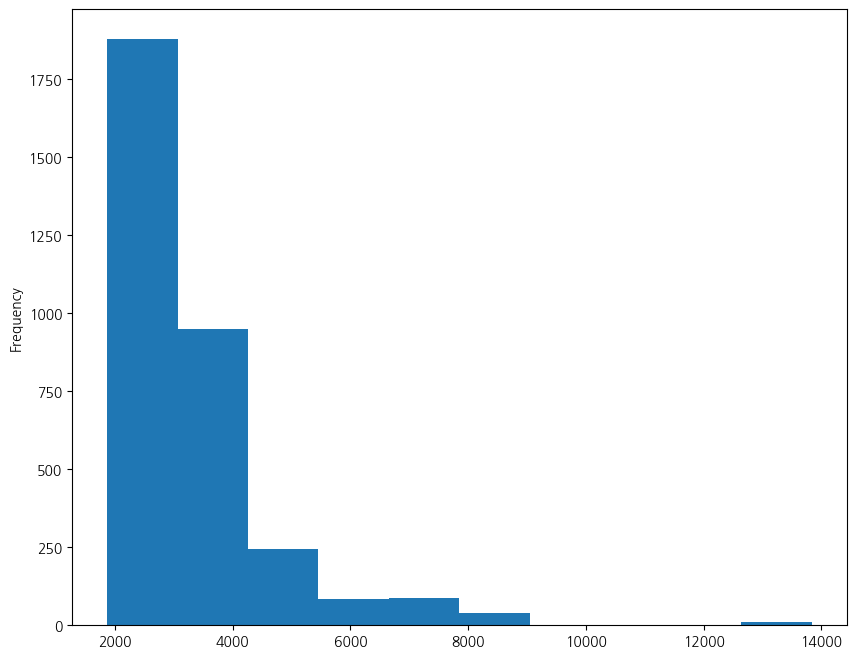

In [16]:
#히스토그램: 가로는 분포, 세로는 빈도
df['분양가'].plot(kind='hist')
#분양가는 2000-3000의 가격이 가장 많이 분포

<Axes: ylabel='Density'>

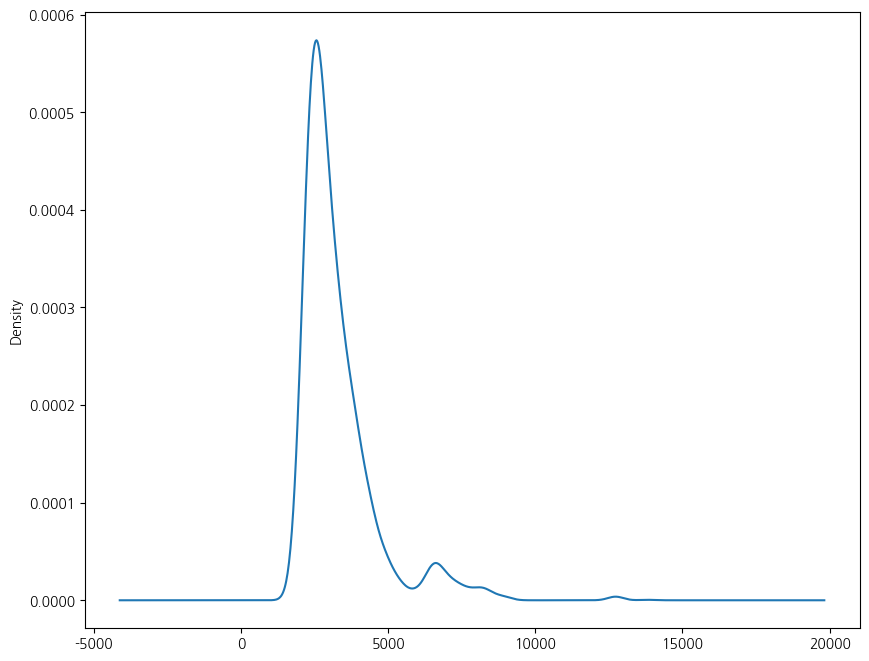

In [17]:
df['분양가'].plot(kind='kde')

<Axes: xlabel='분양가', ylabel='연도'>

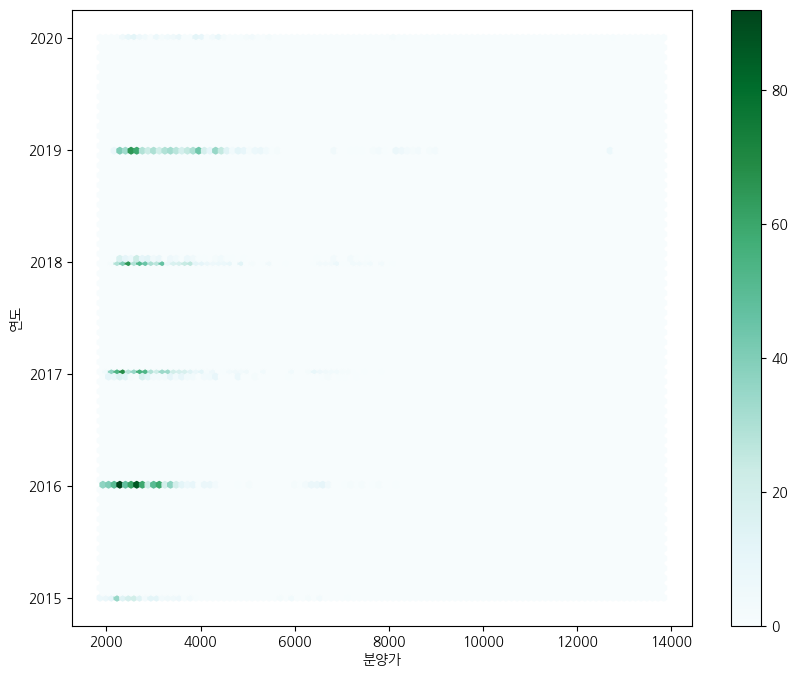

In [18]:
df.plot(kind='hexbin',x='분양가',y='연도')

<Axes: xlabel='분양가', ylabel='연도'>

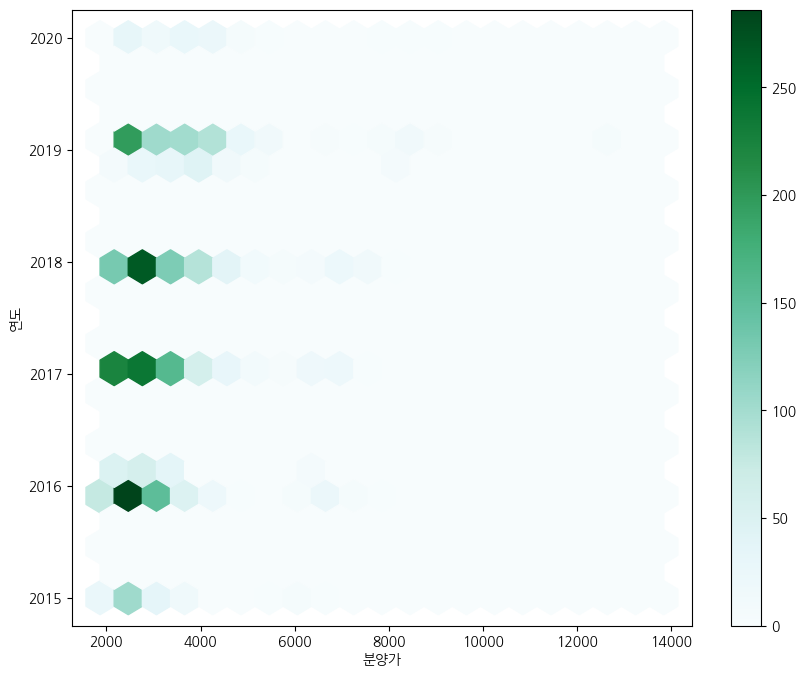

In [19]:
df.plot(kind='hexbin',x='분양가',y='연도', gridsize=20)
#연도별로 2000~3000사이의 가격이 가장 분포가 많고, 2016~18년에는 특정 가격에 많이 몰려있음

<Axes: >

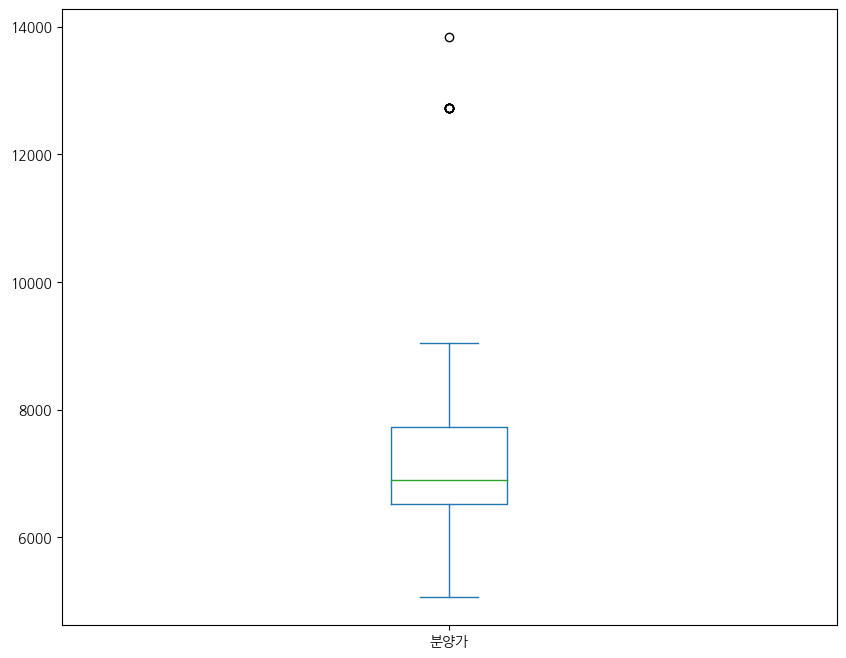

In [23]:
df_seoul=df.loc[df['지역']=='서울']
df_seoul['분양가'].plot(kind='box')
#중앙값, IQR, 이상치를 알 수 있음

<Axes: ylabel='분양가'>

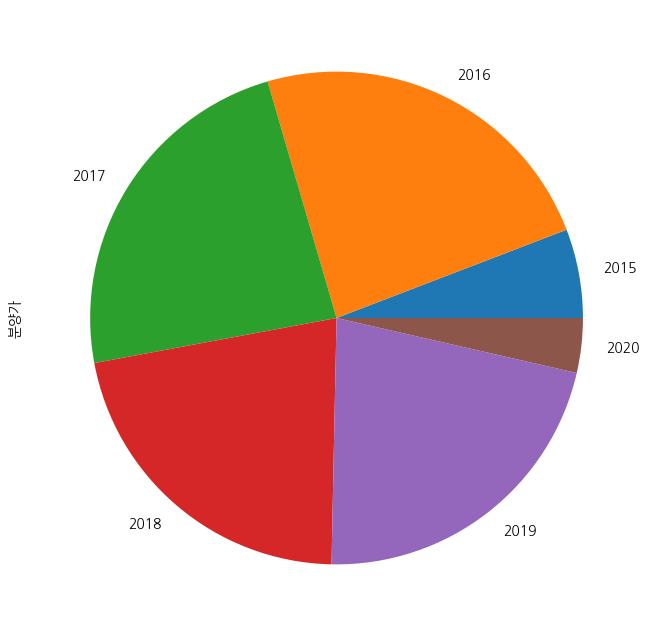

In [24]:
df.groupby('연도')['분양가'].count().plot(kind='pie')

<Axes: xlabel='월', ylabel='분양가'>

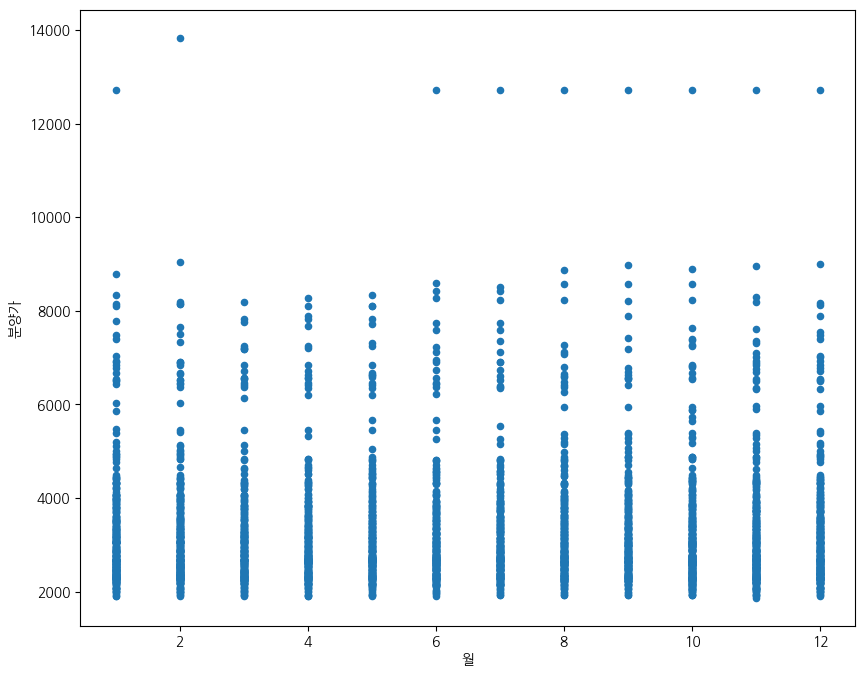

In [25]:
df.plot(x='월', y='분양가', kind='scatter')

In [26]:
'''
2. Matplotlib 스타일(Appendix)
plt는 matplotlib
'''

'\n2. Matplotlib 스타일(Appendix)\n'

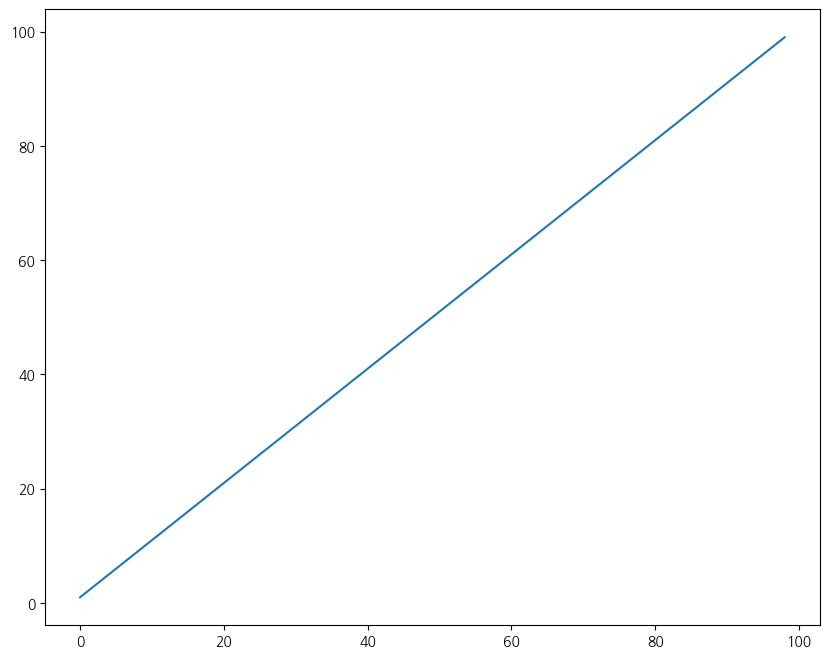

In [32]:
#단일 그래프 생성
data=np.arange(1,100)
plt.plot(data)
plt.show()

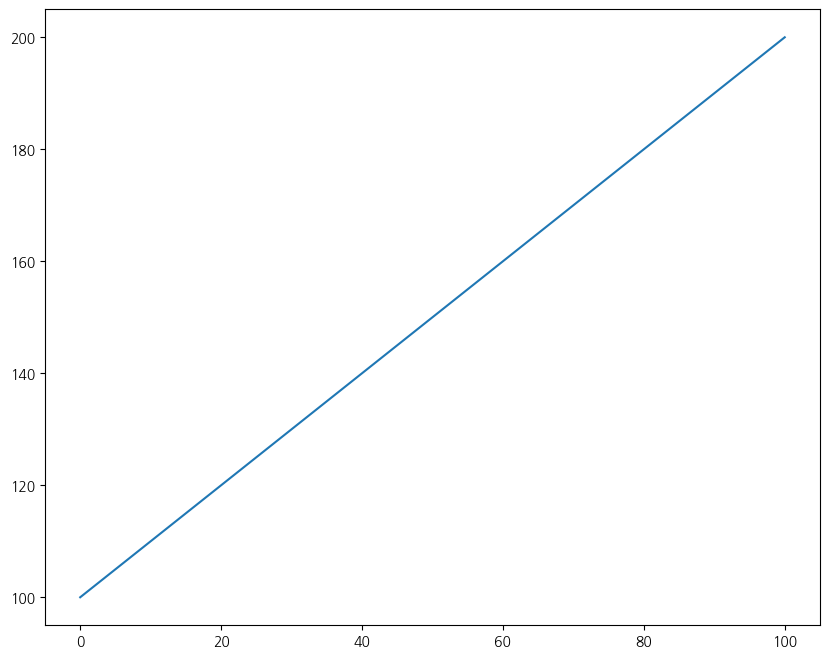

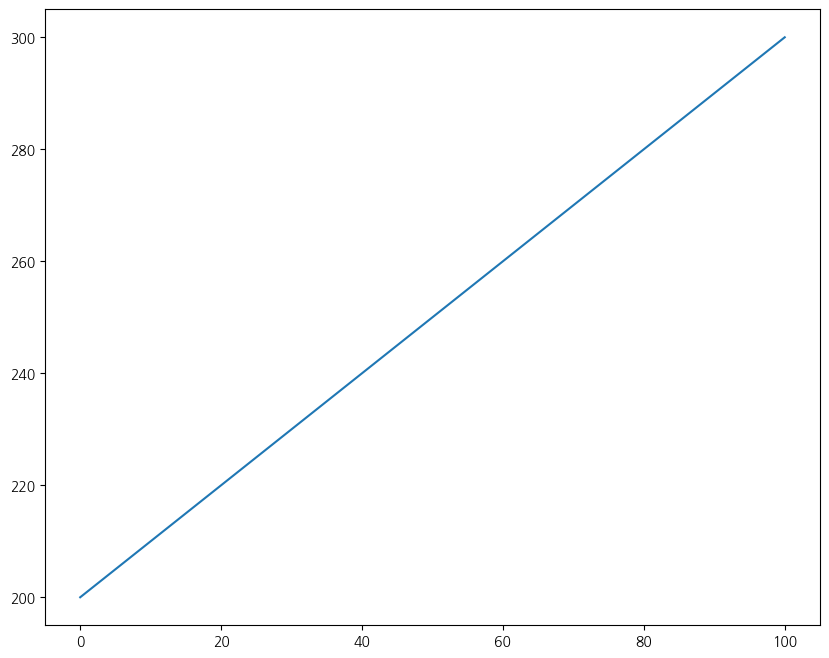

In [36]:
#다중그래프
#figure()로 새로운 캔버스를 생성해서 2개를 다른 캔퍼스에 그리기
data=np.arange(100,201)
plt.plot(data)
data2=np.arange(200,301)
plt.figure()
plt.plot(data2)
plt.show()

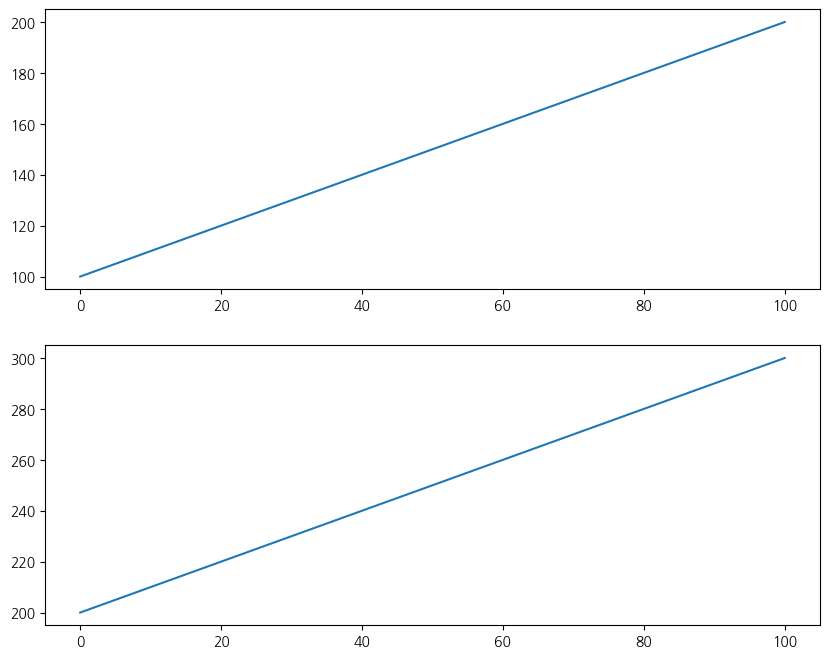

In [39]:
#subplot => subplot(row, column, index)
data=np.arange(100,201)
plt.subplot(2,1,1)
plt.plot(data)
data2 = np.arange(200, 301)
plt.subplot(2, 1, 2)
plt.plot(data2)

plt.show()


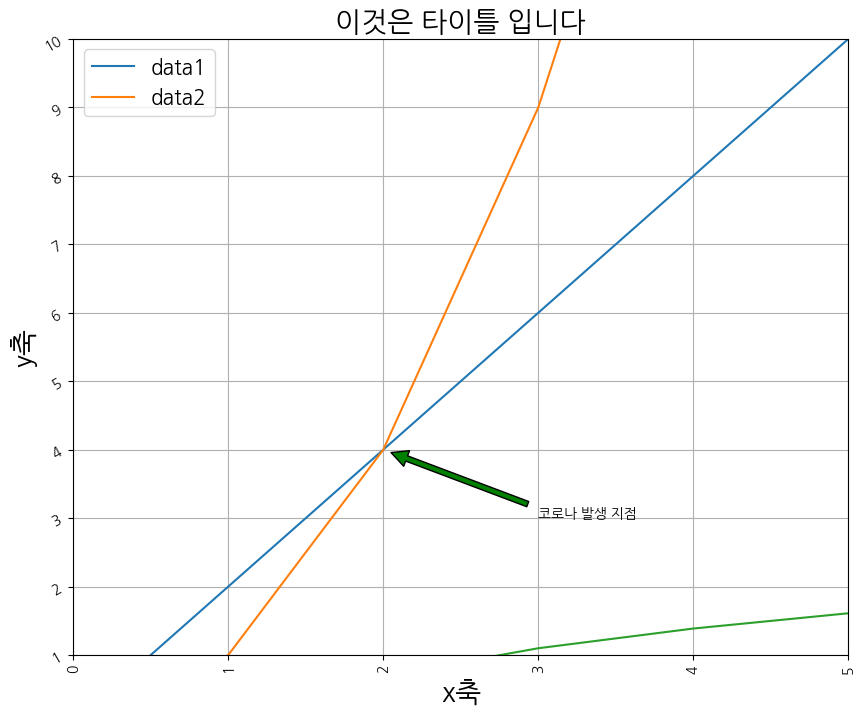

In [64]:
#타이틀, x,y축 label설정
# plt.plot([1, 2, 3], [3, 6, 9]) #x좌표, y좌표
# plt.plot([1, 2, 3], [2, 4, 9])

plt.plot(np.arange(10), np.arange(10)*2)
plt.plot(np.arange(10), np.arange(10)**2)
plt.plot(np.arange(10), np.log(np.arange(10)))

# 타이틀 & font 설정
plt.title('이것은 타이틀 입니다',fontsize=20)
#x,y축 label설정
plt.xlabel('x축',fontsize=20)
plt.ylabel('y축',fontsize=20)

#x tick, y tick설정
plt.xticks(rotation=90)
plt.yticks(rotation=30)

#범례(legend 설정)
plt.legend(['data1', 'data2'], fontsize=15)

#x,y limit 설정: x와 y의 범위를 만들어서 그 안의 수들만 표현
plt.xlim(0,5)
plt.ylim(1,10)

#그리드(격자) 추가
plt.grid()

#annotate 설정(특정 지점을  가르키는 화살표)
#plt.annotate(텍스트, xy좌표, 화살표가 적힐 좌표, 화살표속성들(shrinks는 수축))
plt.annotate('코로나 발생 지점', xy=(2,4), xytext=(3,3), arrowprops=dict(facecolor='green', shrink=0.05))
#
plt.show()

In [2]:
'''
matplotlib 그래프

line: 선그래프: 연속적 데이터

bar: 바 그래프:그룹별 비교
barh: 수평 바 그래프

hist: 히스토그램: 분포-빈도를 시각화

imshow: array 형식의 이미지 데이터를 시각화

3D그래프

box: 박스 플롯: 4분위수 나타낼 수 있음

area: 면적 그래프

pie: 파이 그래프: 원 그래프

scatter: 산점도 그래프: x,y 모두 수치형으로 지정해줘야함

'''

'\nmatplotlib 그래프\n\nline: 선그래프: 연속적 데이터\n\nbar: 바 그래프:그룹별 비교\nbarh: 수평 바 그래프\n\nhist: 히스토그램: 분포-빈도를 시각화\n\nimshow: array 형식의 이미지 데이터를 시각화\n\n3D그래프\n\nbox: 박스 플롯: 4분위수 나타낼 수 있음\n\narea: 면적 그래프\n\npie: 파이 그래프: 원 그래프\n\nscatter: 산점도 그래프: x,y 모두 수치형으로 지정해줘야함\n\n'

In [9]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Unicode warning 제거 (폰트 관련 경고메시지)
plt.rcParams['axes.unicode_minus']=False

# 그래프 출력 사이즈 설정
plt.rcParams["figure.figsize"] = (10, 8)

In [4]:
n=50
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.arange(n)
area = x * y * n**2

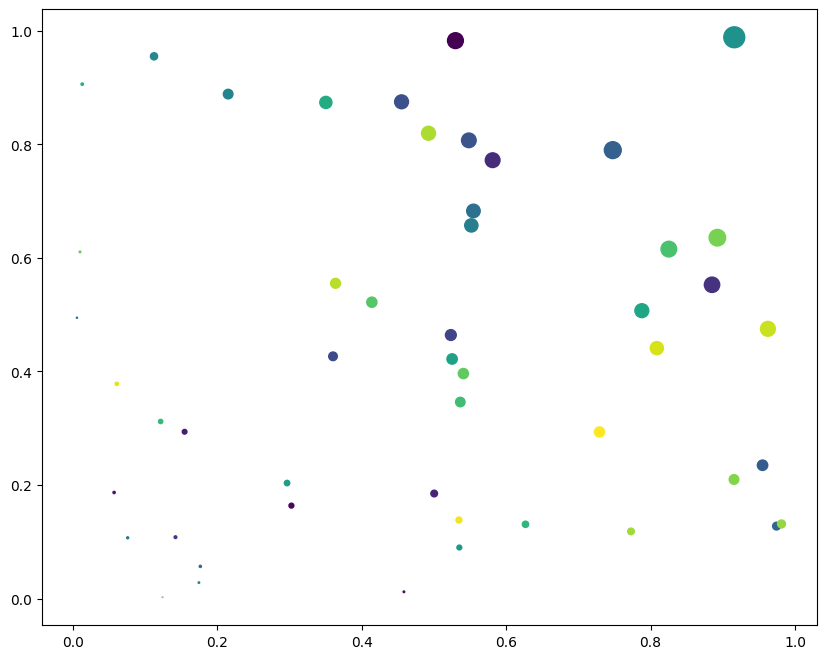

In [5]:
#plt.scatter(x,y,s) 
#s: 마커의 크기(size**2의 형태로 지정하면 원래 지정하려고했던 size와 동일하게 표시)
#c: color 색깔
#alpha:  투명도
plt.scatter(x,y,s=area, c=colors)
plt.show()

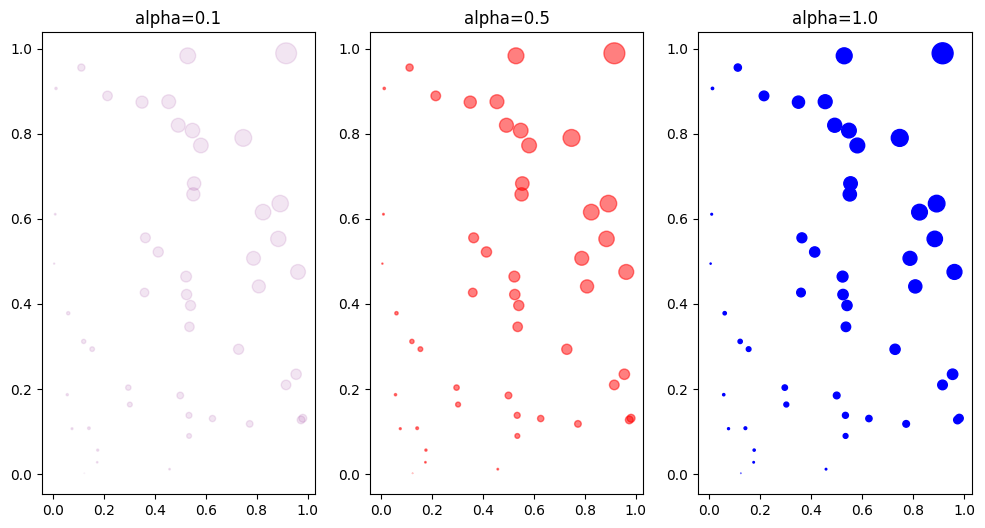

In [8]:
plt.figure(figsize=(12,6)) #그래프 사이즈 설정 (가로길이, 세로길이)
plt.subplot(131) #subplot(row, column, index) 1행3열 그래프에 1번째에 그림
plt.scatter(x,y,s=area, color='purple', alpha=0.1)
plt.title('alpha=0.1')
plt.subplot(132) #subplot(row, column, index) 1행3열 그래프에 1번째에 그림
plt.scatter(x, y, s=area, color='red', alpha=0.5)
plt.title('alpha=0.5')
plt.subplot(133) #subplot(row, column, index) 1행3열 그래프에 1번째에 그림
plt.scatter(x,y,s=area, color='blue', alpha=1.0)
plt.title('alpha=1.0')
plt.show()

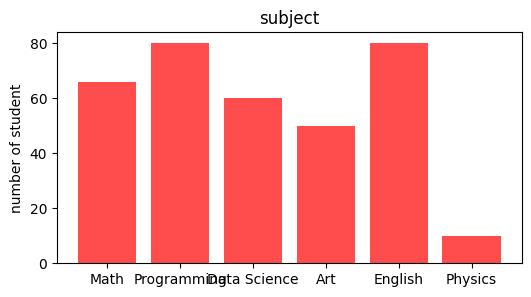

In [16]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.figure(figsize=(6,3))
plt.bar(x,y, align='center', alpha=0.7, color='red')
plt.xticks(x) #x축 눈금 설정
plt.ylabel('number of student')
plt.title('subject')
plt.show()

Text(0.5, 1.0, 'subject')

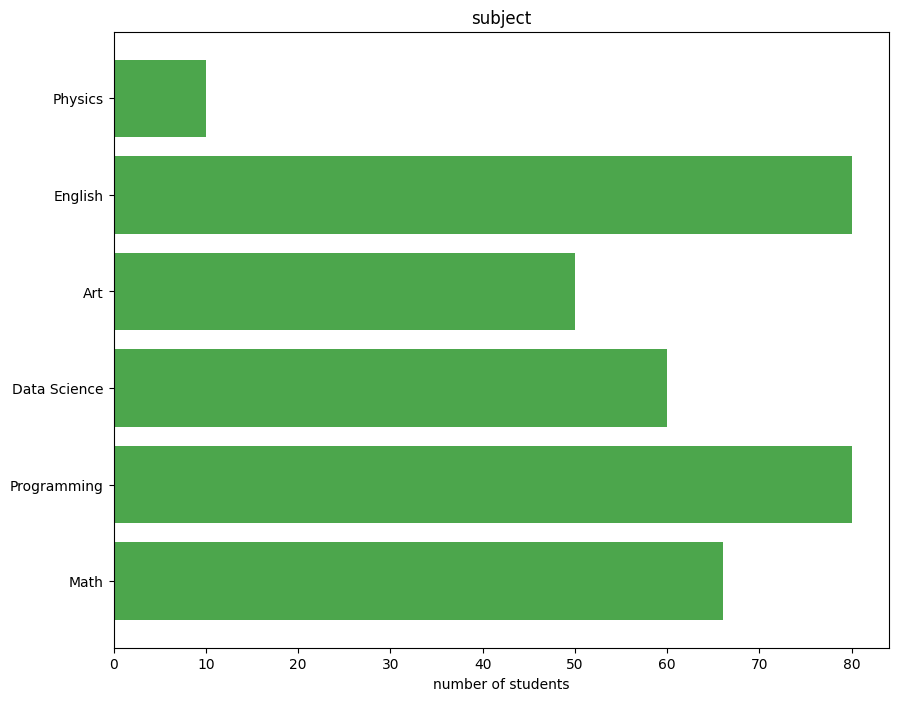

In [18]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

plt.barh(x,y, align='center', alpha=0.7, color='green')
plt.yticks(x) #barh는 yticks이 기준이 됨
plt.xlabel('number of students')
plt.title('subject')

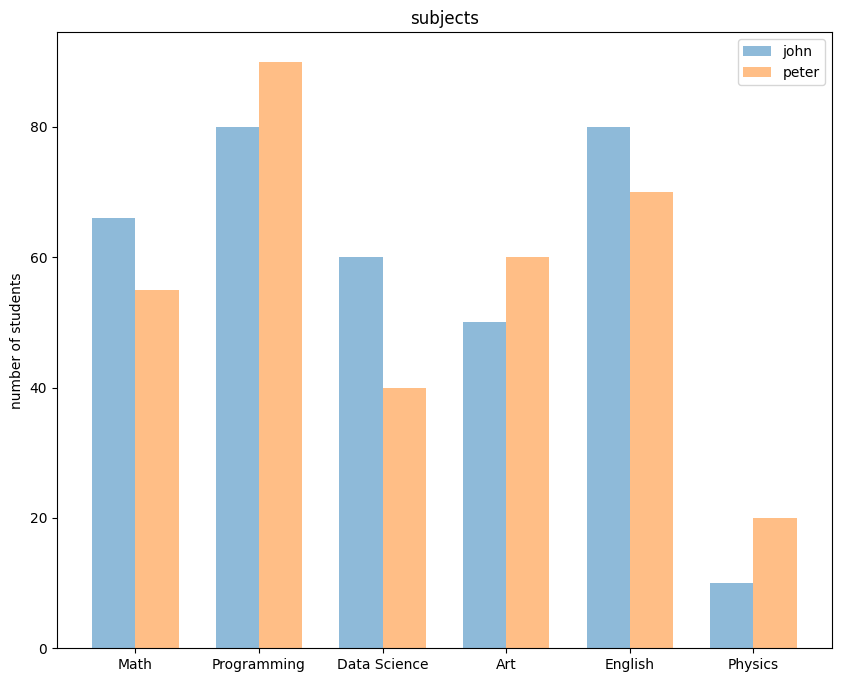

In [26]:
#비교 bar그래프 만들기
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label)) #x의 개수만큼 랜덤 배열을 만듬
y_1 = [66, 80, 60, 50, 80, 10]
y_2 = [55, 90, 40, 60, 70, 20]

#막대의 전체넓이 지정
width=0.35

#subplots생성:여러개의 axes객체를 한번에 생성함
#1)plt.subplot(2,1,1)
#2)fig,axes=plt.subplots(2,3)= 2행 3열의 그리드에서 6개의 axes의 객체 생성
#fig는 전체 subplot을 말함(subplt안에 몇개의 그래프가 있던지 상관없이 전체 1개의사이즈)
#axes는 각각 subplot객체를 일컫음
fig, axes = plt.subplots() 

#넓이 설정
axes.bar(x-width/2, y_1, width, align='center', alpha=0.5)
axes.bar(x+width/2, y_2, width, align='center', alpha=0.5)
#x(가운데 점)을 기준으로 width/2만큼 넓이 더한것=x범주 1개의 넓이

plt.xticks(x)
axes.set_xticklabels(x_label) #axes객체에 x_label 붙이기
plt.ylabel('number of students')
plt.title('subjects')

plt.legend(['john','peter']) #범례 나타내기 
plt.show()

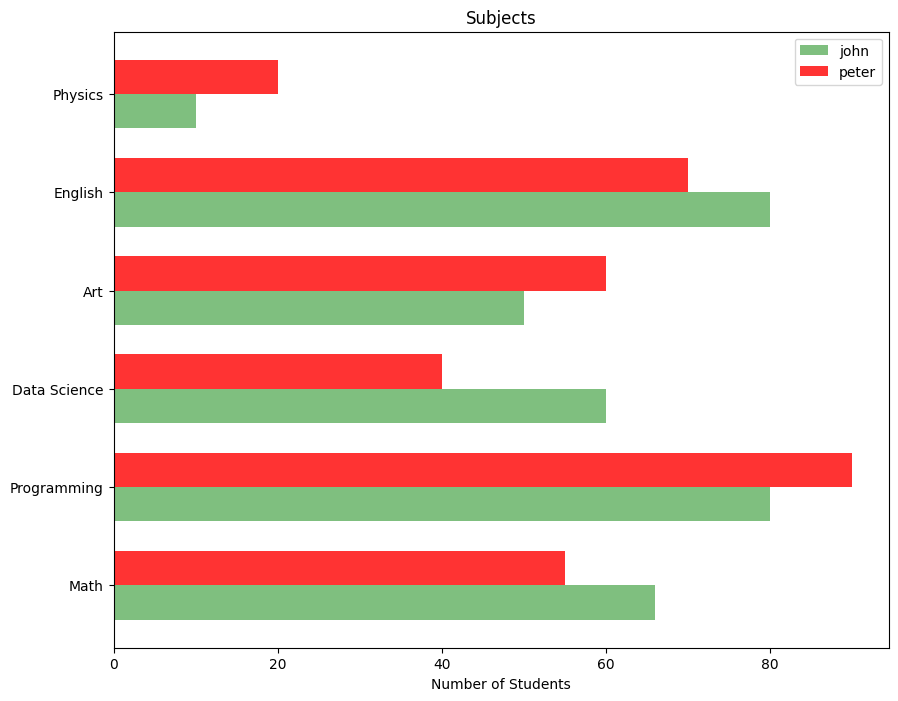

In [27]:
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label))
y_1 = [66, 80, 60, 50, 80, 10]
y_2 = [55, 90, 40, 60, 70, 20]

# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.barh(x - width/2, y_1, width, align='center', alpha=0.5, color='green')
axes.barh(x + width/2, y_2, width, align='center', alpha=0.8, color='red')

# xtick 설정
plt.yticks(x)
axes.set_yticklabels(x_label)
plt.xlabel('Number of Students')
plt.title('Subjects')

plt.legend(['john', 'peter'])

plt.show()

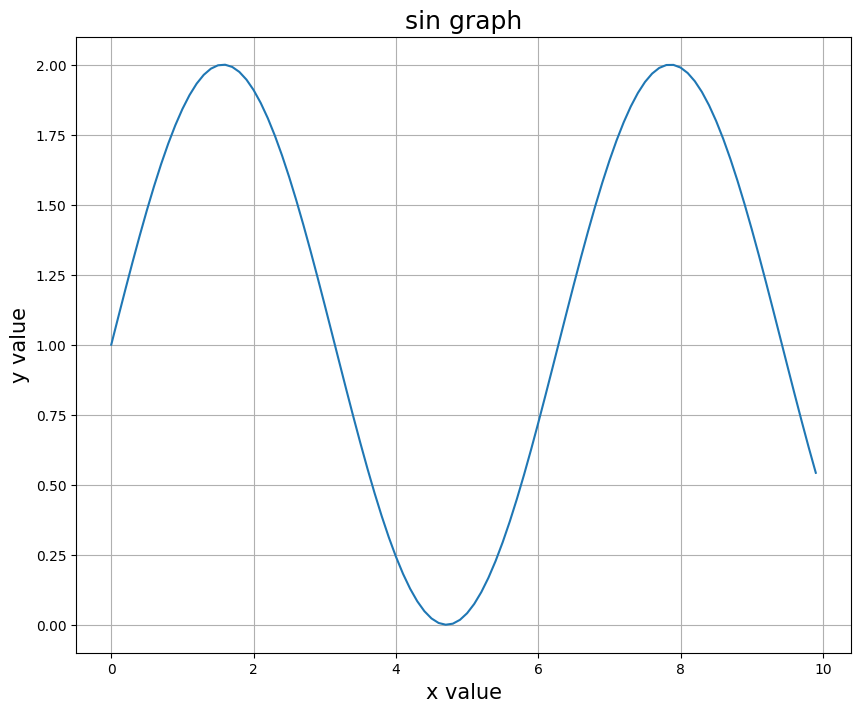

In [34]:
#line plot

#sin그래프 그리기
x = np.arange(0, 10, 0.1)
y = 1+ np.sin(x)
plt.plot(x,y)

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin graph', fontsize=18)

plt.grid() #격자 그리기
plt.show()

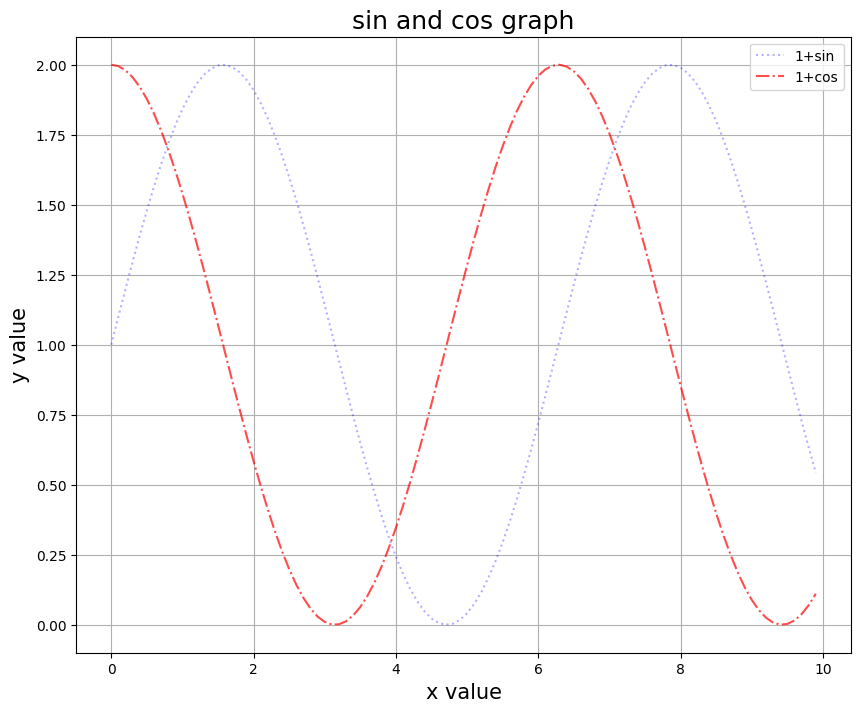

In [37]:
#cos그래프와 sin그래프 2개 그리기

x = np.arange(0, 10, 0.1)
y_1 = 1 + np.sin(x)
y_2 = 1 + np.cos(x)

#label은 범례
plt.plot(x, y_1, label='1+sin', color='blue', alpha=0.3, linestyle=':')
plt.plot(x, y_2, label='1+cos', color='red', alpha=0.7, linestyle='-.')

plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', fontsize=15)
plt.title('sin and cos graph', fontsize=18)

plt.grid()
plt.legend()

plt.show()


In [39]:
#area plot(면적 그래프): fill_between함수를 사용
#최소 5, 최대 10 수들 중 20개를 뽑아라
y = np.random.randint(low=5, high=10, size=20)
y

array([9, 7, 5, 5, 9, 5, 9, 5, 6, 9, 6, 9, 9, 9, 5, 8, 7, 8, 8, 8])

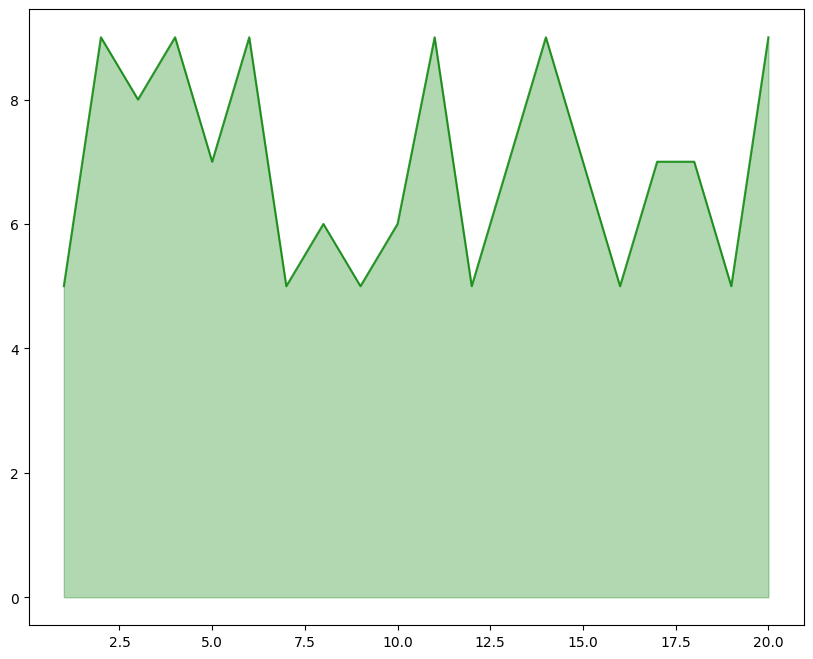

In [46]:
x = np.arange(1,21)
y =  np.random.randint(low=5, high=10, size=20)

plt.fill_between(x,y, color='green', alpha=0.3)
plt.plot(x,y, color='green', alpha=0.8)
plt.show()

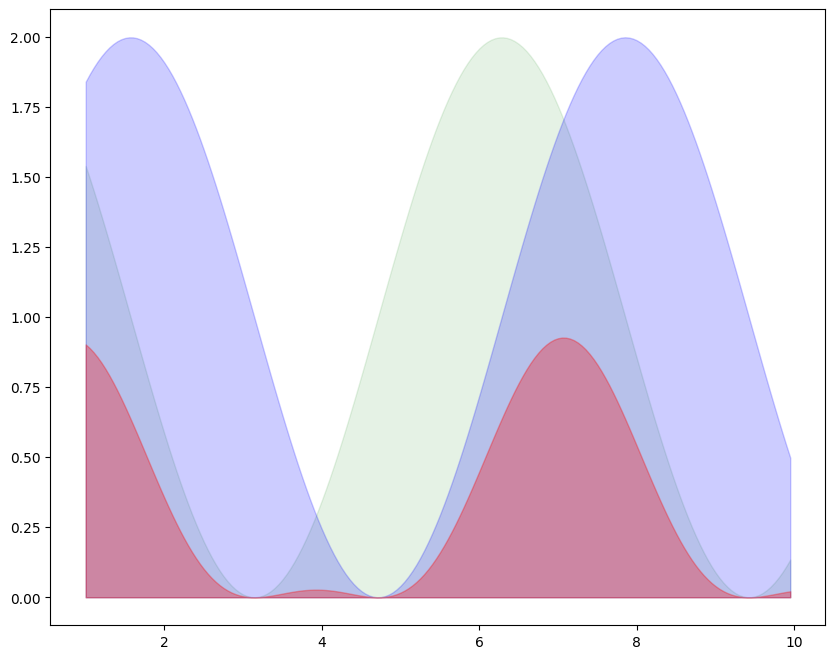

In [47]:
#여러 그래프를 겹쳐서 표현(예시는 3개의 그래프를 따로따로 그래프 만듬)
x = np.arange(1, 10, 0.05)
y_1 =  np.cos(x)+1
y_2 =  np.sin(x)+1
y_3 = y_1 * y_2 / np.pi

plt.fill_between(x, y_1, color="green", alpha=0.1)
plt.fill_between(x, y_2, color="blue", alpha=0.2)
plt.fill_between(x, y_3, color="red", alpha=0.3)

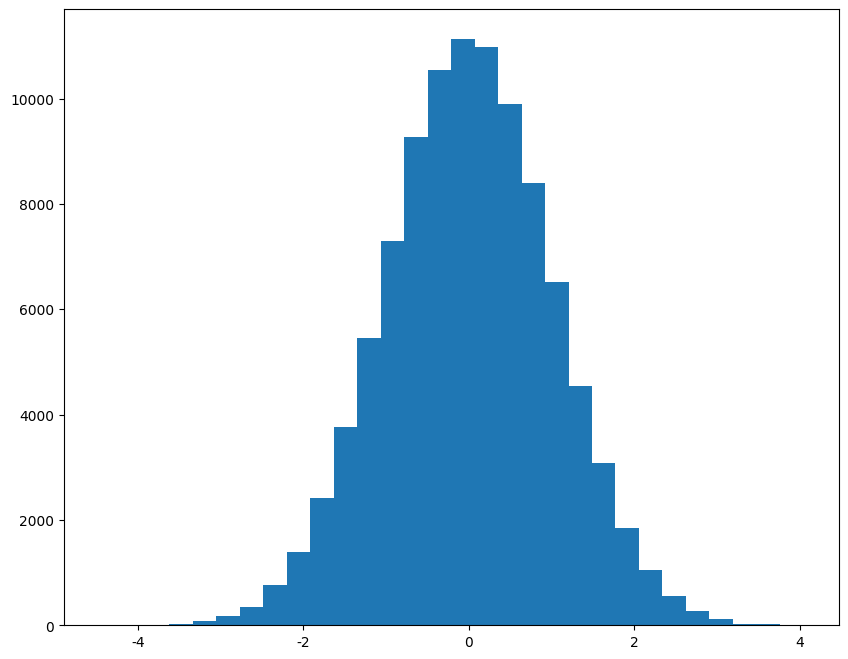

In [51]:
#histogram
n=100000
bins=30 #데이터를 30개의 구간으로 나누겠다
x=np.random.randn(n) #randn: 정규분포를 따르는 난수를 생성
plt.hist(x, bins=bins) #bins: 데이터를 구간으로 나눌 떄의 개수
plt.show()

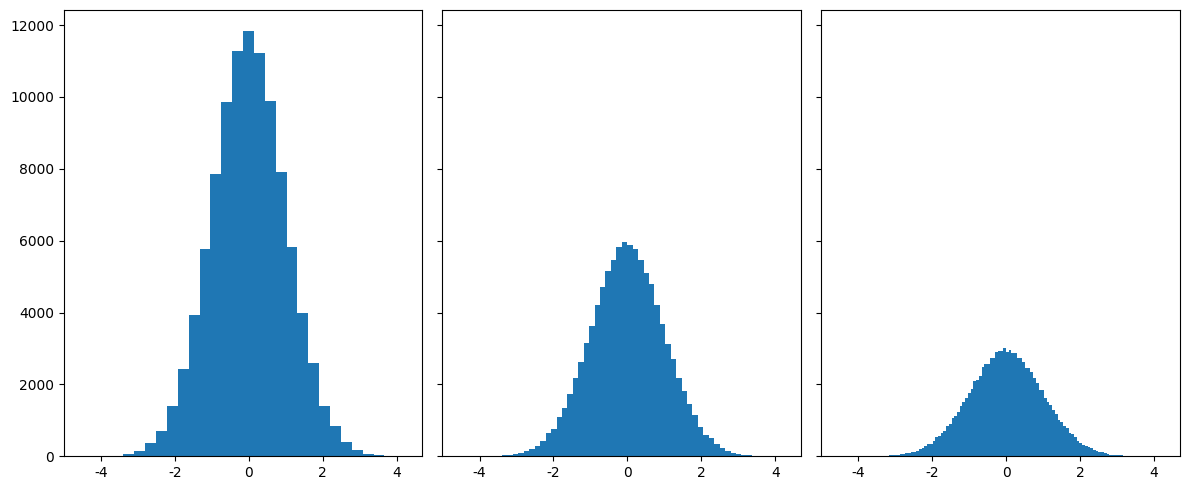

In [52]:
#다중 히스토그램, bin의 크기변화
N = 100000
bins = 30

x = np.random.randn(N)
fig, axs=plt.subplots(1,3, #1행 3열의 그래프를 생성
                     sharey=True, #여러개의 서브플롯이 y축을 공유하게 함
                      tight_layout=True #그래프 요소들이 겹치는 것을 방지
                     ) 
fig.set_size_inches(12,5) 그래프의 가로크기, 세로크기를 조절

axs[0].hist(x, bins=bins) #각각의 객체들 그리기
axs[1].hist(x, bins=bins*2)
axs[2].hist(x, bins=bins*4)

plt.show()

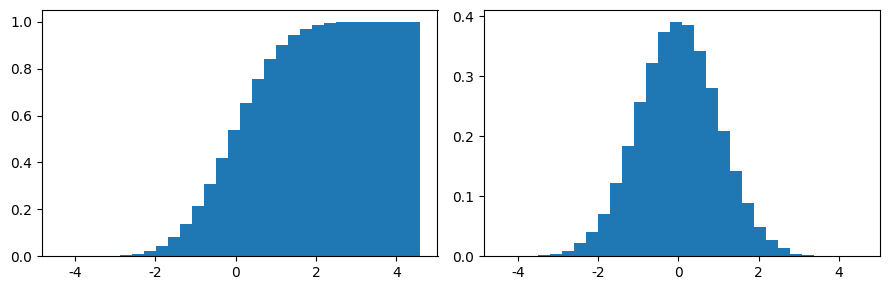

In [53]:
N = 100000
bins = 30

x = np.random.randn(N)

fig, axs = plt.subplots(1, 2, 
                        tight_layout=True
                       )
fig.set_size_inches(9, 3)

#density=True는 히스토그램의 높이를 확률밀도함수로 정규화
#cumulative=True: 누적값을 표시
axs[0].hist(x, bins=bins, density=True, cumulative=True)
axs[1].hist(x, bins=bins, density=True)

plt.show()

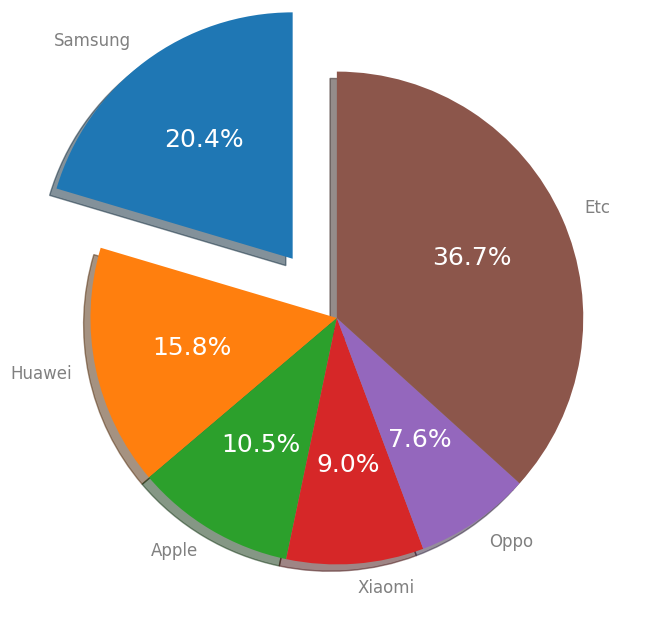

In [55]:
labels = ['Samsung', 'Huawei', 'Apple', 'Xiaomi', 'Oppo', 'Etc']
sizes = [20.4, 15.8, 10.5, 9, 7.6, 36.7]
explode = (0.3, 0, 0, 0, 0, 0) #툭 튀어져 나온 비율: 0번 인덱스가 튀어나옴(0.3)

#patches: 각 항목의 그래픽 객체 정보가 들어있는 리스트
#texts: 레이블의 텍스트 객체 정보가 들어있는 리스트
#autotexts: 파이위에 그려지는 텍스트 효고를 다룰때 활용
patches, texts, autotexts = plt.pie(sizes,
                                    explode=explode, #파이에서 툭 튀어나온 비율
                                    labels=labels,  
                                    autopct='%1.1f%%', #퍼센트 자동으로 표기
                                    shadow=True, #그림자 표시
                                    startangle=90) #파이를 그리기 시작할 각도
for t in texts:
    t.set_fontsize(12)
    t.set_color('gray')

# pie 위의 텍스트에 대한 스타일 적용
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(18)

plt.show()

In [17]:
#box plot
# 샘플 데이터 생성
spread = np.random.rand(50) * 100 #(전체 데이터 개수)
center = np.ones(25) * 50 #모든 원소가 1*50인 배열을 25개 (중앙값)
flier_high = np.random.rand(10) * 100 + 100 #이상치
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

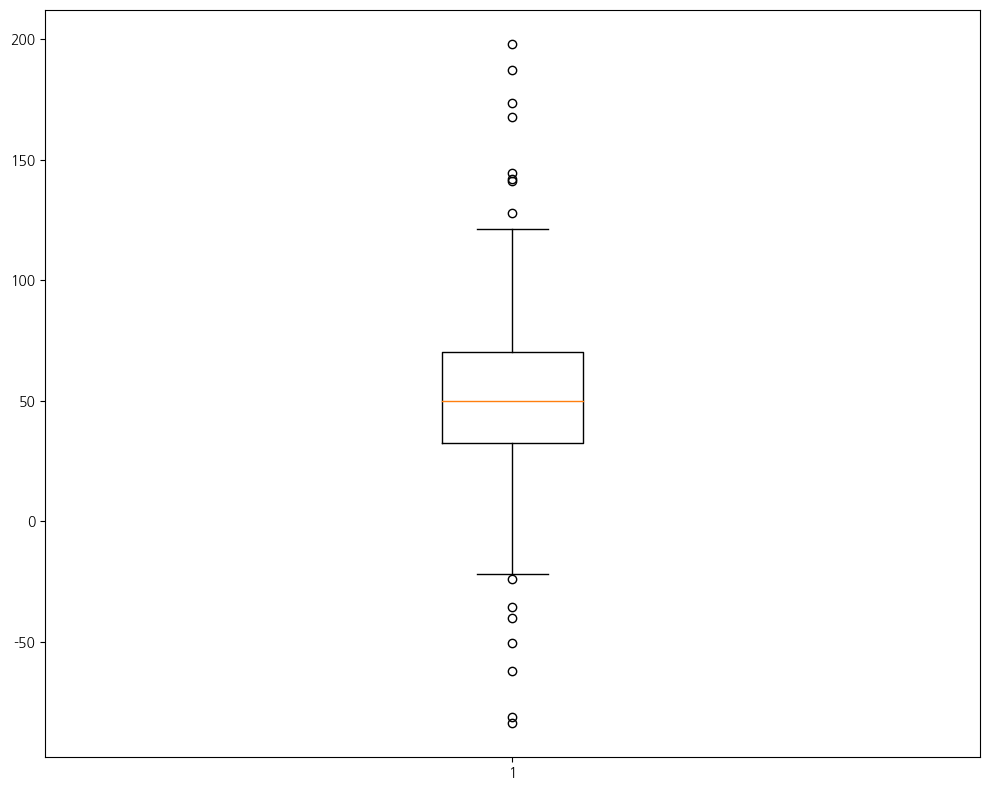

In [5]:
plt.boxplot(data)
plt.tight_layout() #그래프 요소가 서로 겹치지 않게함
plt.show()

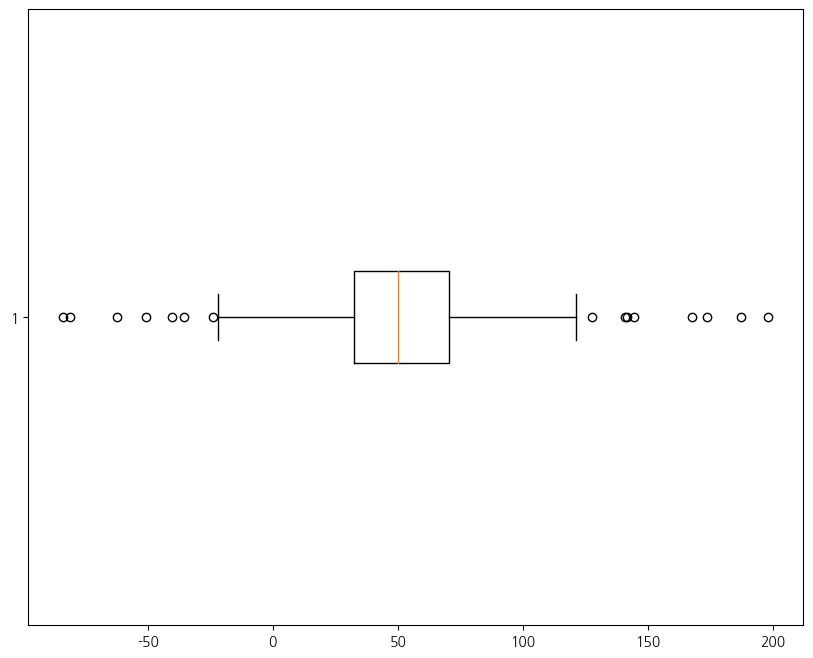

In [6]:
plt.boxplot(data,vert=False) #표시하고자하는 축을 바꿀 수 있음
plt.show()

In [8]:
'''3D그래프'''
from mpl_toolkits import mplot3d

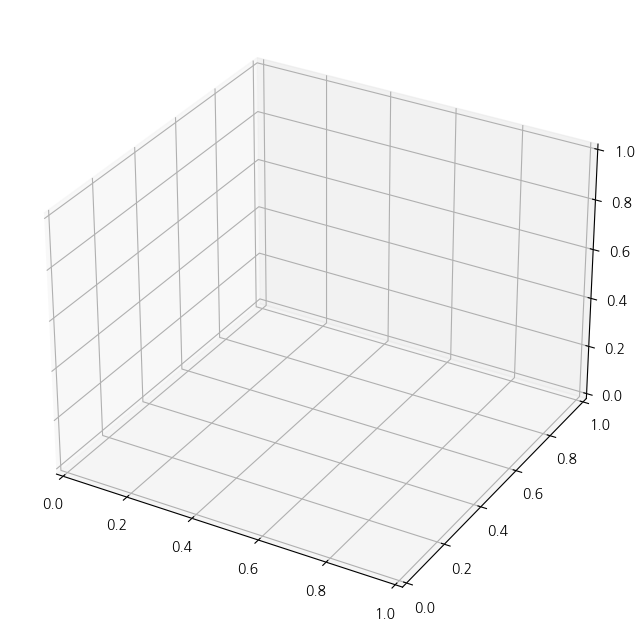

In [9]:
#밑그림 그리기
fig=plt.figure() #figure-캔퍼스 생성
ax=plt.axes(projection='3d')  #축을 3차원으로 바꿔라
#projection: 3차원 데이터를 2차원으로 변환하여 그래프를 그리는 데 사용

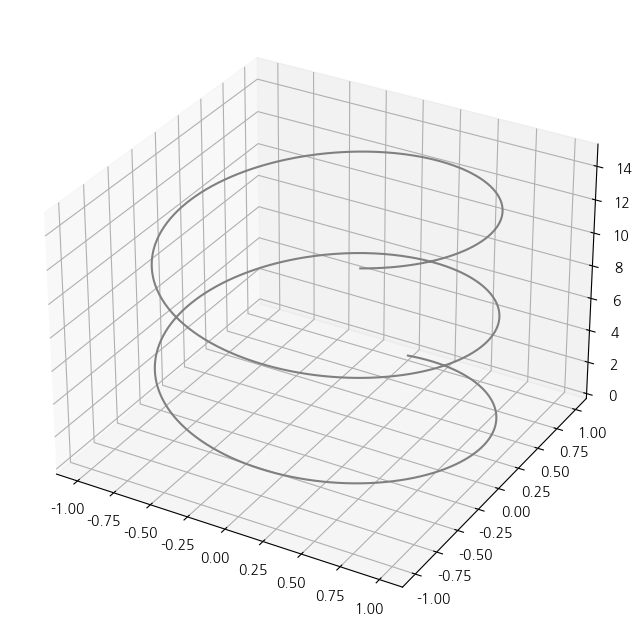

In [13]:
ax = plt.axes(projection='3d')

z=np.linspace(0,15,1000) #0~15까지 1000개의 값으로 채우기
#linspace: 주어진범위에서 일정한 간격으로 분할
x=np.sin(z) #x는 sin그래프
y=np.cos(z) #y는 cos그래프

ax.plot3D(x,y,z,'gray')
plt.show()

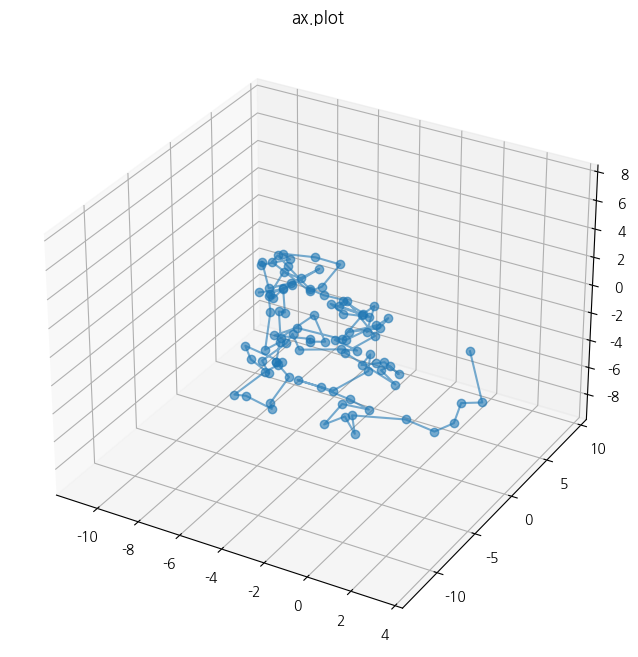

In [12]:
ax = plt.axes(projection='3d')

sample_size = 100
x = np.cumsum(np.random.normal(0, 1, sample_size))
y = np.cumsum(np.random.normal(0, 1, sample_size))
z = np.cumsum(np.random.normal(0, 1, sample_size))
#cumsum: 배열의 원소들을 누적합한 값을 반환
#normal: 정규분포에서 무작위 샘플을 추출해서 반환

# marker 추가
ax.plot3D(x, y, z, alpha=0.6, marker='o')

plt.title("ax.plot")
plt.show()

In [3]:
#imshow: array형식의 이미지 데이터를 시각화

In [2]:
'''
seaborn은 matplotlib보다 더 다양한 그래프, 다양한 색상, pandas 데이터프레임과 높은 호환성, 
! 그래프를 임의로 그려야하는 경우 matplotlib 사용
! dataframe을 가지고 그리는 경우: seaborn
! hue로 하위집합을 만들어서 비교 barplot을 그릴 수 있음 

'''
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


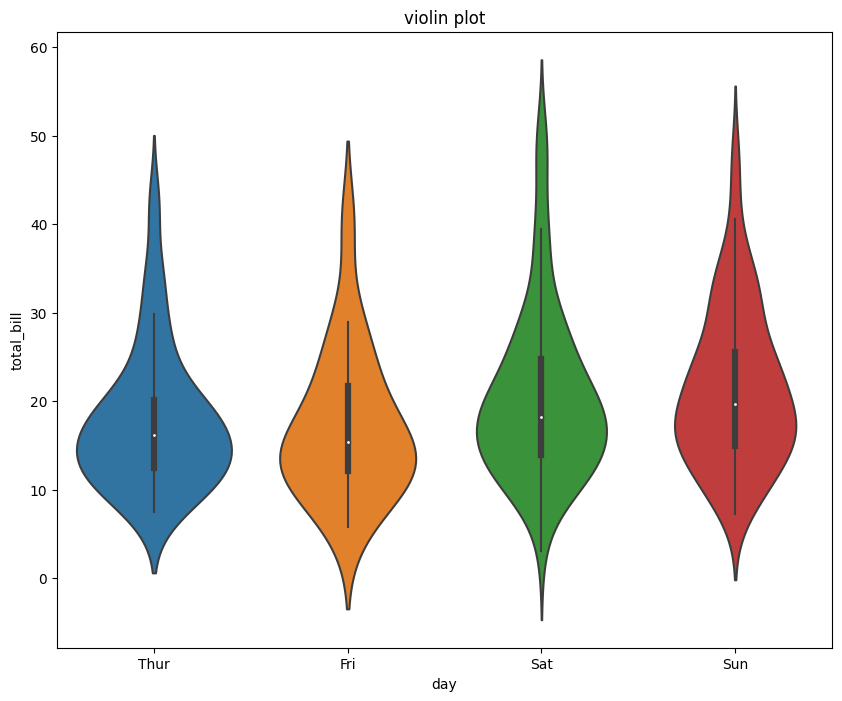

In [13]:
sns.violinplot(x='day',y='total_bill',data=tips)
plt.title('violin plot')
plt.show()

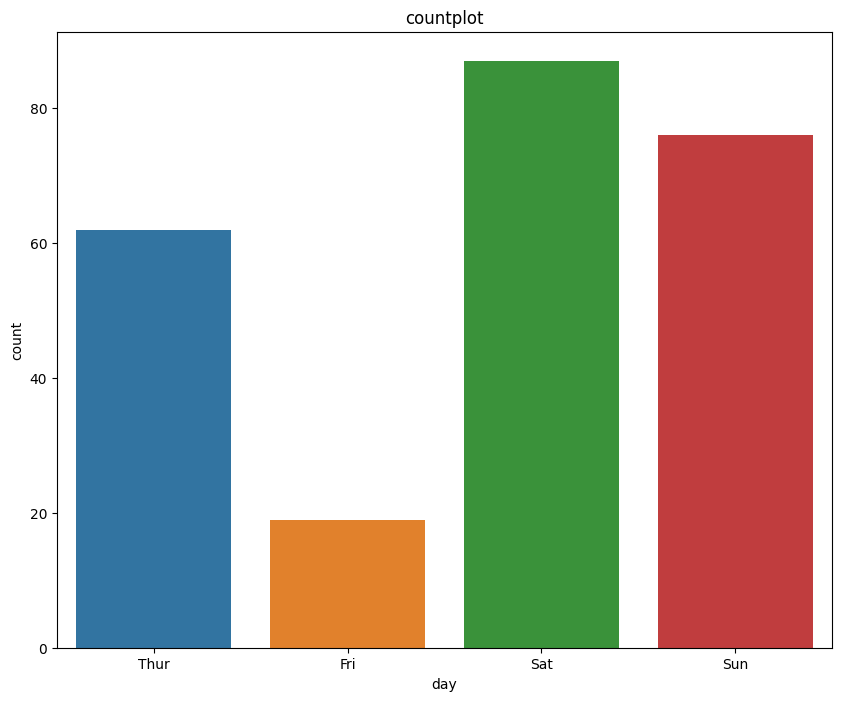

In [14]:
sns.countplot(x=tips['day'])
plt.title('countplot')
plt.show()

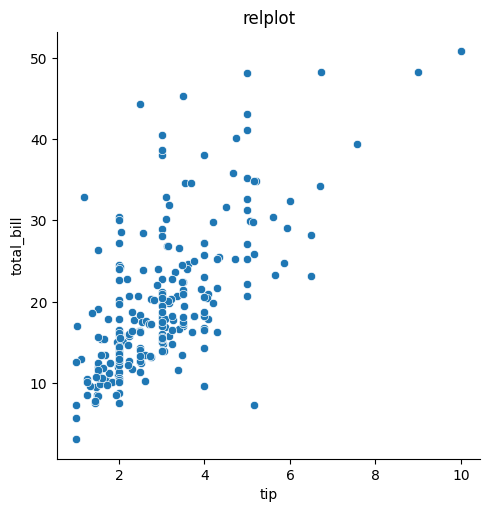

In [18]:
sns.relplot(x='tip',y='total_bill', data=tips)
#다양한 유형의 그래프를 생성할 수 있음(scatterplot, lineplot등)
#catplot: 범주형 데이터를 시각화한 여러 그래프 
plt.title('relplot')
plt.show()

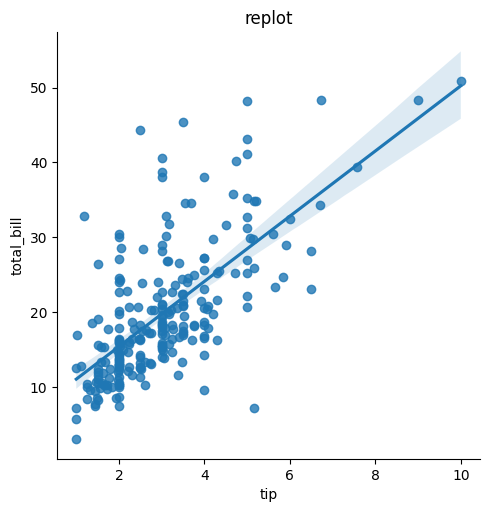

In [20]:
#lmplot: 선형회귀선을 시각화해주는 함수
sns.lmplot(x='tip',y='total_bill',data=tips)
plt.title('replot')
plt.show()

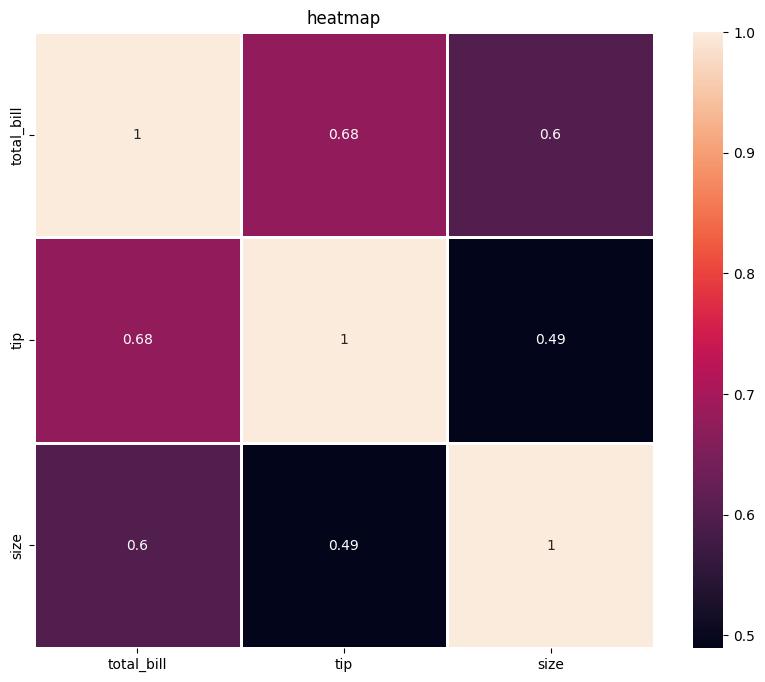

In [21]:
plt.title('heatmap')
sns.heatmap(tips.corr(), annot=True, linewidths=1)
#annot: 각 셀에 값을 표기하기
plt.show()

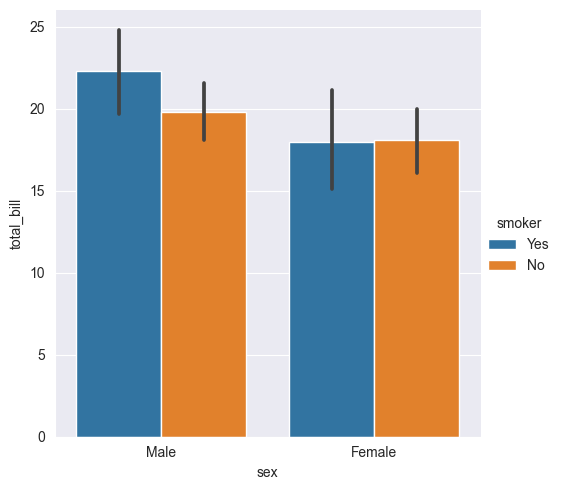

In [52]:
#hue옵션: 데이터를 하위 집합(smoker, none-smoker)으로 분할해서 비교할 수 있게 함

sns.catplot(x='sex',y='total_bill',
           data=tips,
           kind='bar',
           hue='smoker')

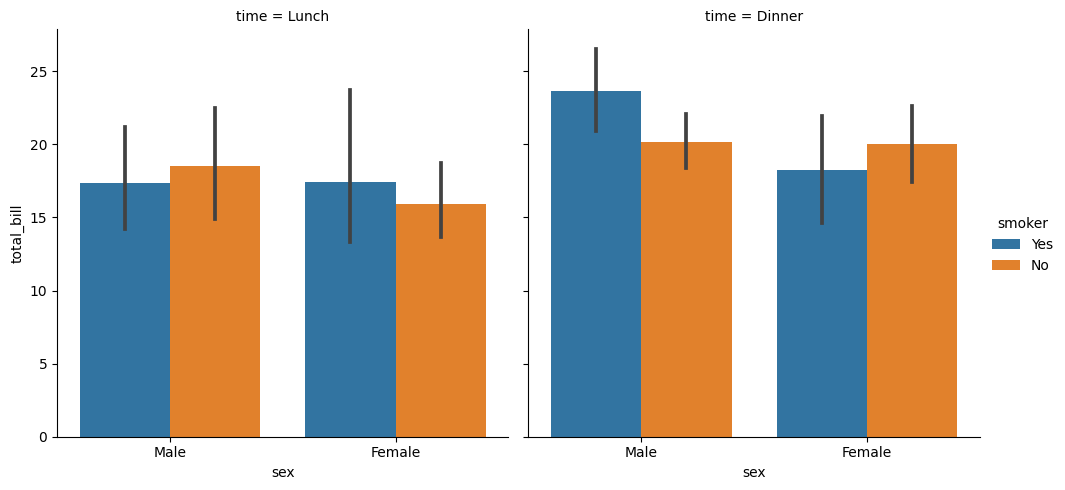

In [25]:
#col: 이 속성을 기준으로 그래프를 분할함
sns.catplot(x="sex", y="total_bill",
            hue="smoker", 
            col="time",
            data=tips, 
            kind="bar")
plt.show()

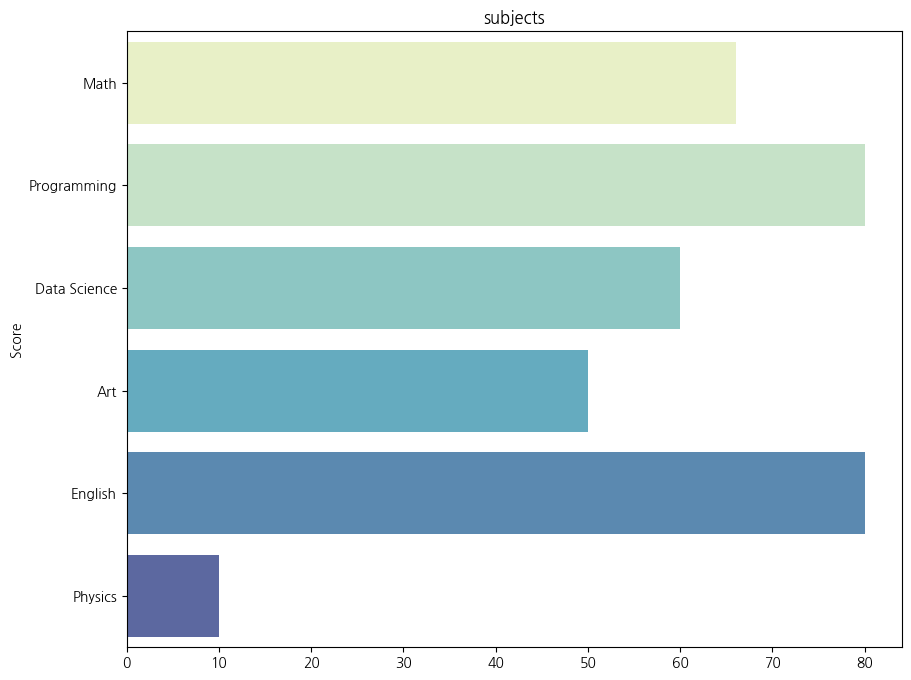

In [6]:
x = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
y = [66, 80, 60, 50, 80, 10]

#barh는 x=y, y=x를 서로 바꾸면 그릴 수 있다
sns.barplot(x=y,y=x, alpha=0.8, palette='YlGnBu')
plt.ylabel('Score')
plt.title('subjects')
plt.show()

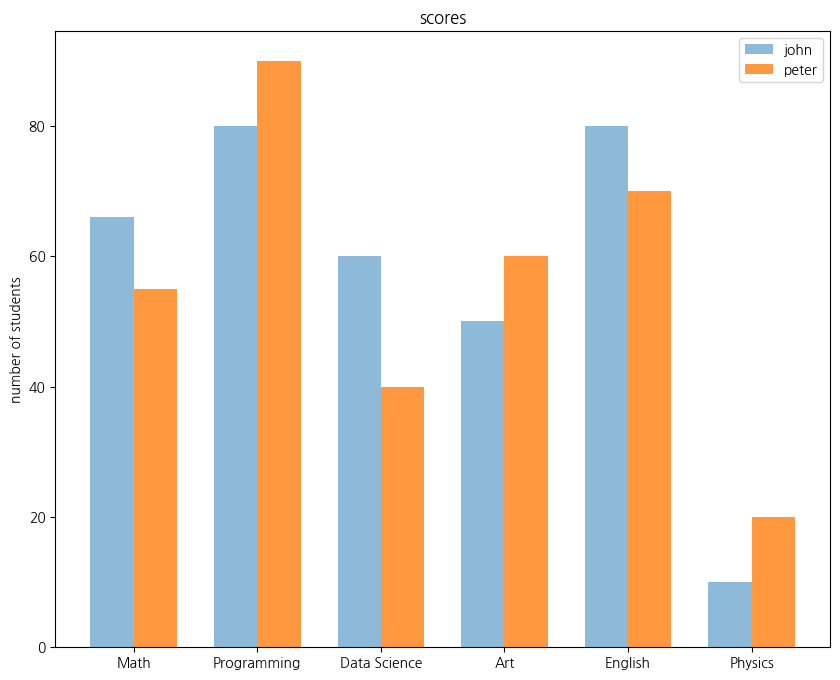

In [14]:
x_label = ['Math', 'Programming', 'Data Science', 'Art', 'English', 'Physics']
x = np.arange(len(x_label)) #x의 개수만큼 연속된 수 배열(x의 넓이)
y_1 = [66, 80, 60, 50, 80, 10]
y_2 = [55, 90, 40, 60, 70, 20]
#넓이 지정
width=0.35
#subplots생성
fig, axes=plt.subplots()
#넓이 설정:axes개체 각각 적용
axes.bar(x-width/2, y_1, width, align='center', alpha=0.5)
axes.bar(x+width/2, y_2, width, align='center', alpha=0.8)

plt.xticks(x) #x축 눈금 설정
axes.set_xticklabels(x_label) #label 설정
plt.ylabel('number of students')
plt.title('scores')
plt.legend(['john','peter'])
plt.show()

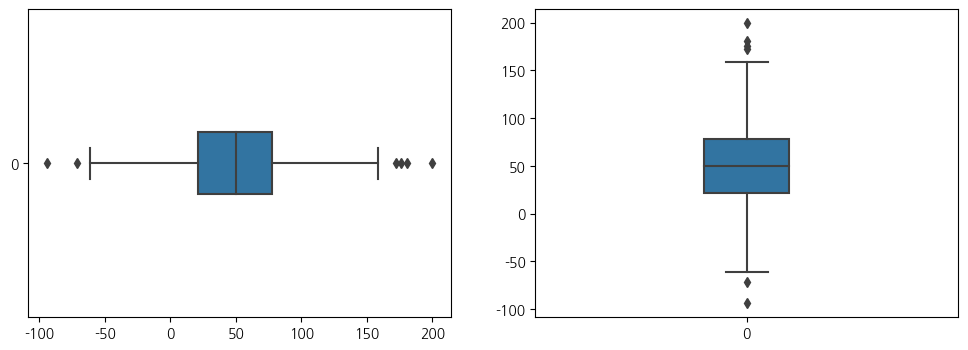

In [18]:
# 샘플 데이터 생성
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(data=data, orient='h',width=0.2)
plt.subplot(122)
sns.boxplot(data=data, orient='v', width=0.2)
plt.show()

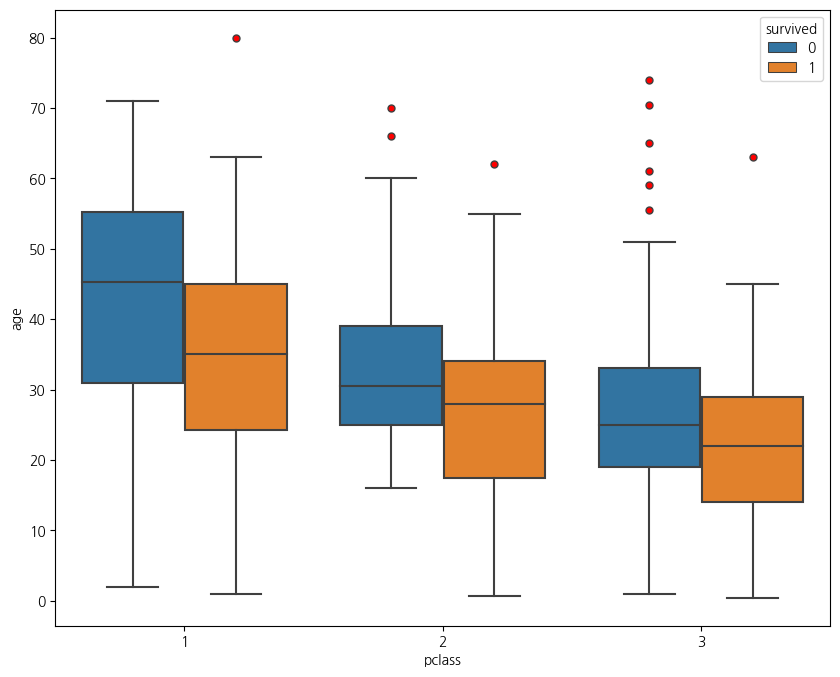

In [26]:
#hue로 비교 boxplox그리기, 이상치 옵션주기
#flierprops: 이상치를 더욱 눈에 띄게 만들거나 다른 마커와 구별하기 쉽게 설정
titanic = sns.load_dataset('titanic')
outlier_marker = dict(markerfacecolor='r', marker='o')
sns.boxplot(x='pclass', y='age', hue='survived', data=titanic, flierprops=outlier_marker)
plt.show()

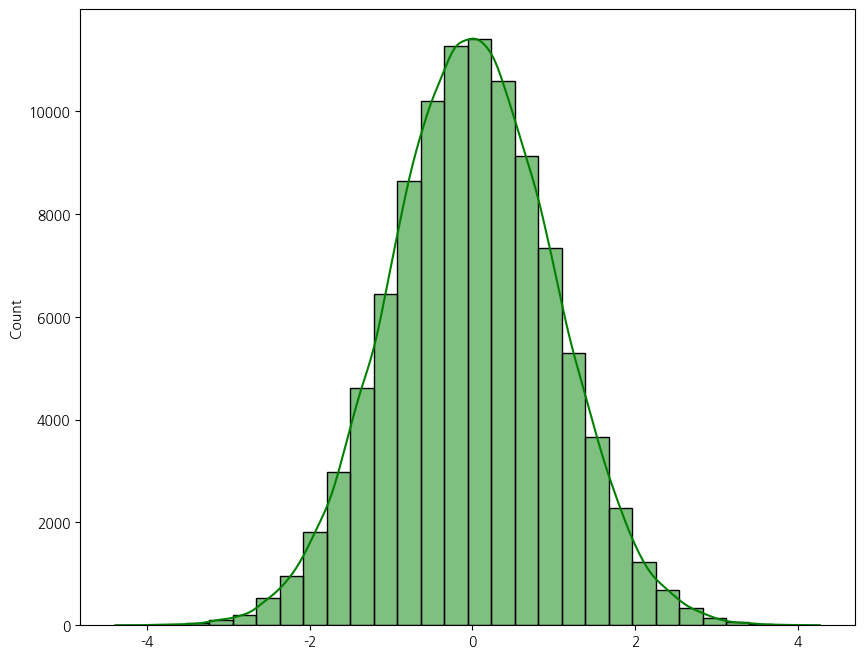

In [28]:
#히스토그램(histplot)
N = 100000
bins = 30 #데이터를 30개의 구간으로 나누겠다

x = np.random.randn(N)

#kde=True의 경우, 그래프 상에 밀도함수 곡선이 추가됨
sns.histplot(x, bins=bins, kde=True, color='g')
plt.show()


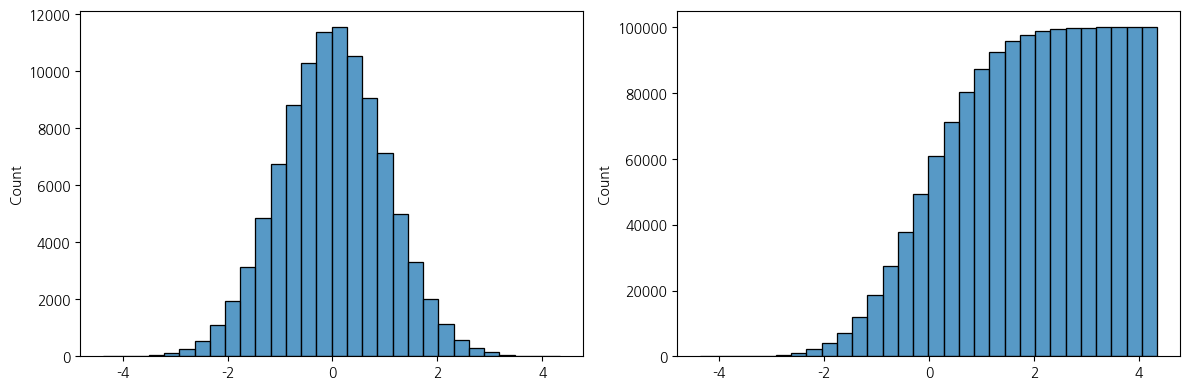

In [31]:
#히스토그램의 여러 옵션주기
N = 100000
bins = 30

x = np.random.randn(N)
fig, axes=plt.subplots(1,2,tight_layout=True) #1행 2열 subplot, tight_layout=여백 설정
fig.set_size_inches(12,4)

sns.histplot(x=x, bins=bins, ax=axes[0])
#누적그래프(cumulative 그래프)를 구하기
#axes[0], axes[1]로 해서 축이 다른 그래프2개 그리기
sns.histplot(x=x, bins=bins, cumulative=True, ax=axes[1])
# axes.bar(x-width/2, y_1, width)
# axes.bar(x+width/2, y_2, width) 
# 이렇게 만들면, 하나의 객체에 2개의 그래프가 그려짐
plt.show()

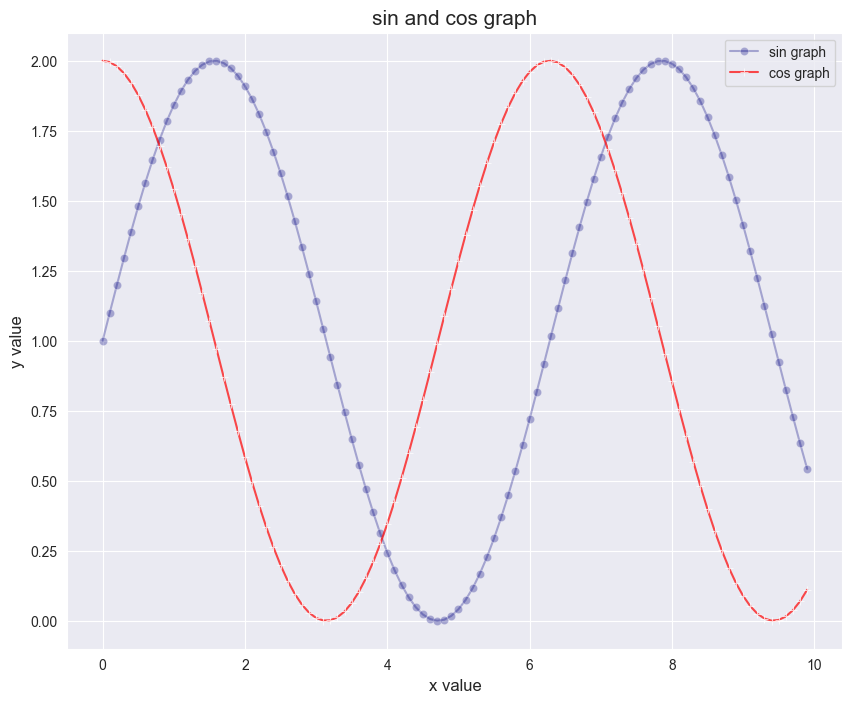

In [44]:
#line plot
x = np.arange(0, 10, 0.1)
y_1 = 1 + np.sin(x)
y_2= 1+np.cos(x)

sns.lineplot(x=x, y=y_1, label='sin graph', color='navy', alpha=0.3, marker='o')
sns.lineplot(x=x, y=y_2, label='cos graph', color='red', alpha=0.7, marker='+')

plt.xlabel('x value', fontsize=12)
plt.ylabel('y value', fontsize=12)
plt.title('sin and cos graph', fontsize=15)

plt.grid() #격자무늬 추가
plt.legend() #범례 추가
plt.show()

In [70]:
'''
seaborn의 통계차트
1. catplot:범주형 데이터를 여러그래프로 시각화할 수 있음
- barplot, boxplot, countplot, violinplot등을 그릴 수 있음(kind를 다르게)
2. countplot
3. heatmap: sns.countplot()
4. histplot: hist(분포)와 kdeplot(밀도)를 통합한 그래프
5. jointplot: scatter(산점도)와 histogram(분포)를 동시에 그려줌
-숫자형데이터만 표현가능함 
6. pairplot: 각 컬럼의 집합들의 모든 조합에 대한 히스토그램과 분포도를 나타냄
-숫자형데이터만 표현가능함 
7. relplot: 두 컬럼간 상관관계 나타냄
8. rugplot: 데이터위치를 나타냄, x축 위 작은 선분(rug)로 나타내서 데이터의 위치,분포를 보여줌
- 카펫 rug(털)처럼 하나씩 심어져 있다
9. swarm plot:범주형 데이터분포를 시각화(차이 확인가능), 데이터포인트를 가장 밀집된 곳에 모음
10. violinplot: 컬럼에 대한 데이터의 비교분포도를 확인할 수 있음
- 뚱뚱한 부분은 데이터의 분포, 앙쪽 끝 뾰족한 부분은 데이터의 min,max값임
-비교하려면 hue옵션 사용해야함
11. implot: 컬럼간 선형관계,outlier를 확인하기 좋은 차트

12. kdeplot: 밀도를 시각화
'''

'\nseaborn의 통계차트\n1. catplot:범주형 데이터를 여러그래프로 시각화할 수 있음\n- barplot, boxplot, countplot, violinplot등을 그릴 수 있음(kind를 다르게)\n2. countplot\n3. heatmap: sns.countplot()\n4. histplot: hist(분포)와 kdeplot(밀도)를 통합한 그래프\n5. jointplot: scatter(산점도)와 histogram(분포)를 동시에 그려줌\n-숫자형데이터만 표현가능함 \n6. pairplot: 각 컬럼의 집합들의 모든 조합에 대한 히스토그램과 분포도를 나타냄\n-숫자형데이터만 표현가능함 \n7. relplot: 두 컬럼간 상관관계 나타냄\n8. rugplot: 데이터위치를 x축 위 작은 선분(rug)로 나타내서 데이터의 위치,분포를 보여줌\nsns.kdeplot(x=x)\nsns.rugplot(x=x)\nplt.show()\n9. swarm plot\n10. violinplot\n11. implot\n12. kdeplot: 밀도를 시각화\n'

In [47]:
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


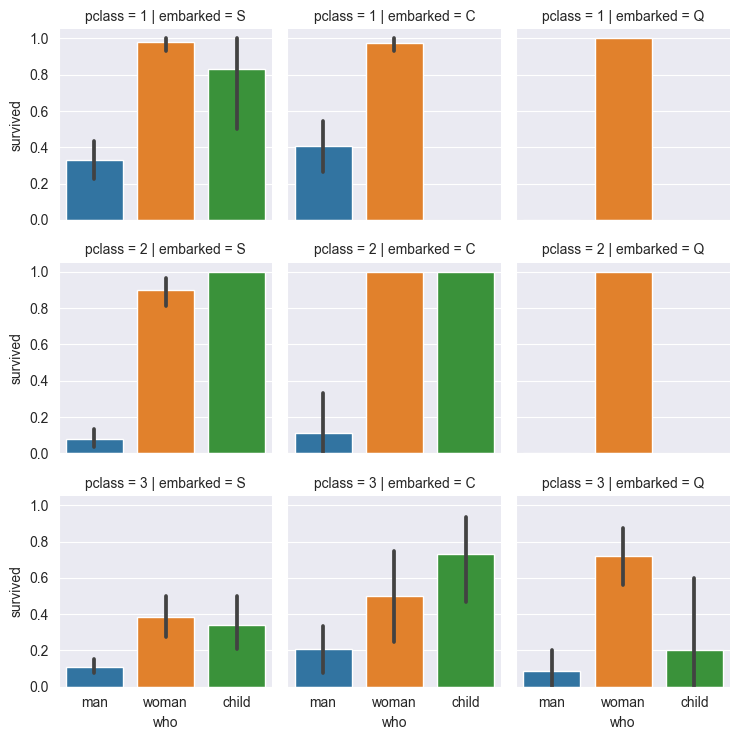

In [49]:
#catplot
#x를 who데이터, y를 survived데이터로하는 그래프의 행을 pclass별로, 열을 embarked로 그린 것 
sns.catplot(x='who', y='survived', row='pclass', col='embarked', kind='bar', height=2.5, data=titanic)

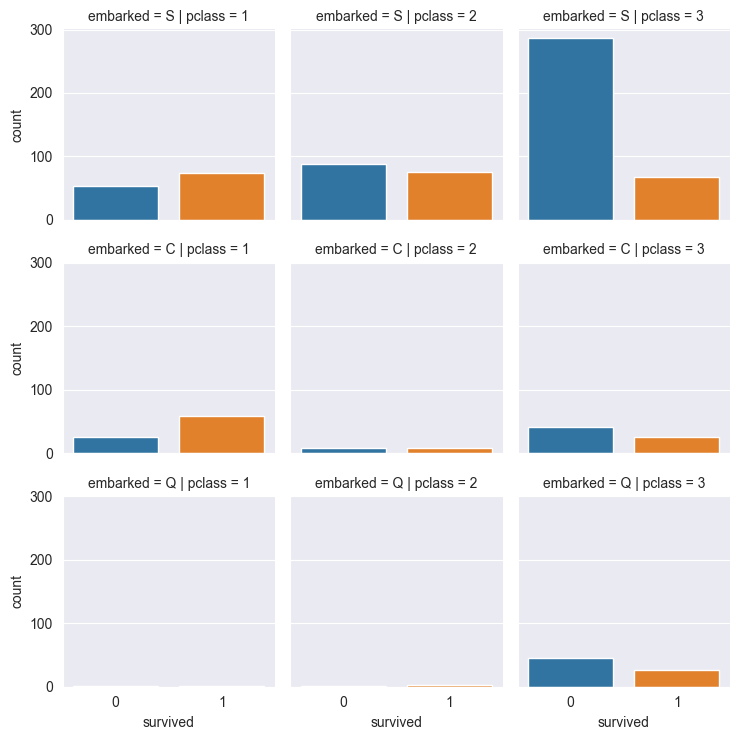

In [51]:
#countplot: y지정필요x
sns.catplot(x='survived', col='pclass', row='embarked',kind='count', height=2.5, data=titanic)

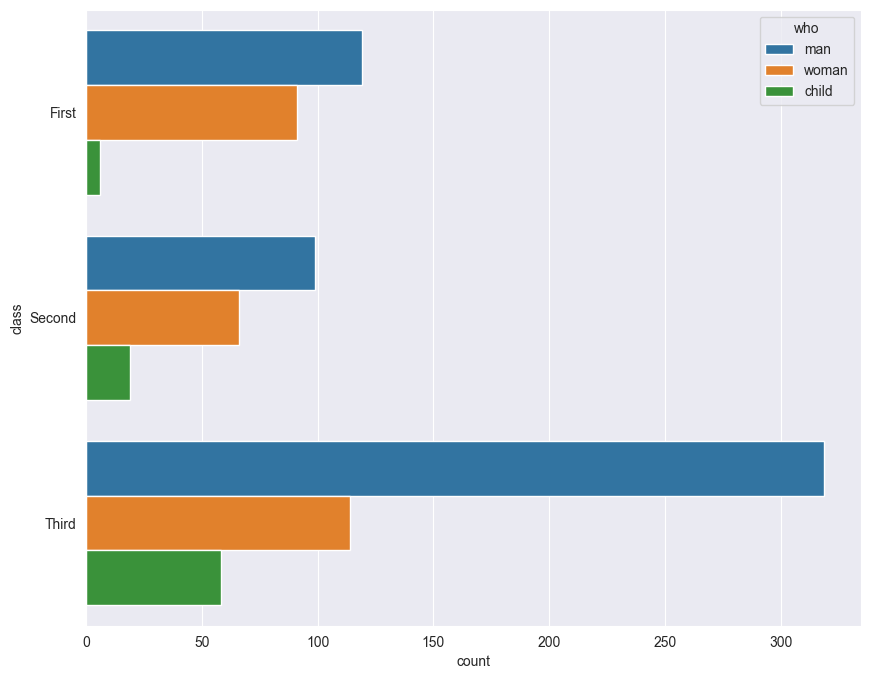

In [53]:
#countplot 가로로 그리기
sns.countplot(y='class', hue='who', data=titanic)
plt.show()

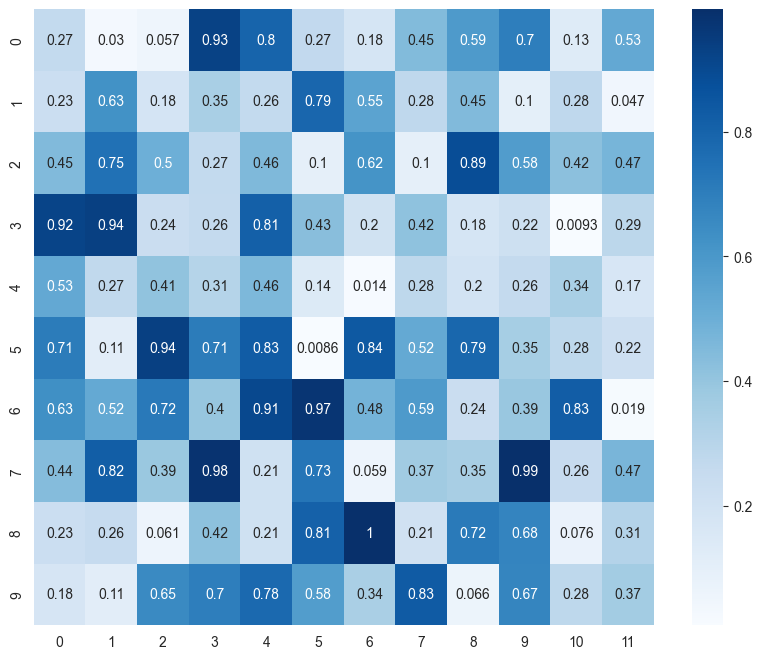

In [56]:
#heatmap
#pivot데이터, corr()데이터를 표현할 때 많이 사용

uniform_data = np.random.rand(10, 12)
plt.figure(figsize=(10, 8)) #그래프 사이즈 설정 (가로길이, 세로길이)
sns.heatmap(uniform_data, cmap='Blues', annot=True)
#cmap: 색상 표시하기, annot: 각 셀에 값을 표기하기
plt.show()

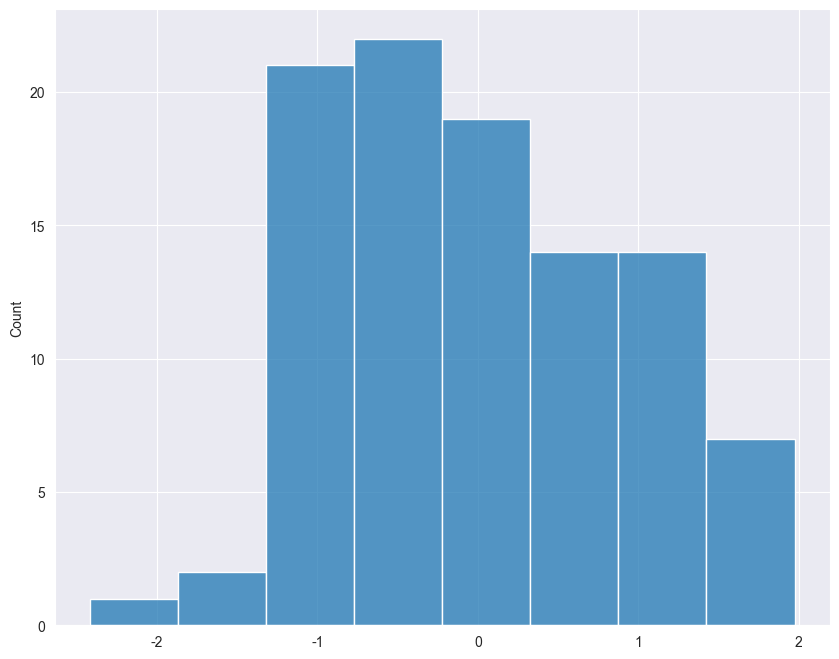

In [58]:
#distplot: hist(분포)와 kdeplot(밀도)를 통합한 그래프 **밀도,분포 설명참고
# 샘플데이터 생성
x = np.random.randn(100)
sns.histplot(x=x)
plt.show()

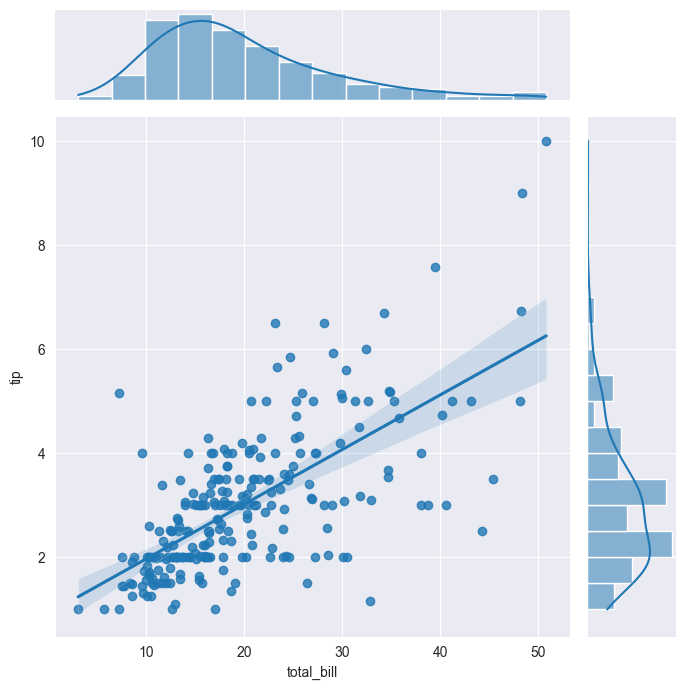

In [62]:
#jointplot: 산점도+분포 동시에 그려줌
sns.jointplot(x='total_bill', y='tip', height=7, data=tips, kind='reg')
#height는 그래프 크기, kind='reg': 선을 그려줌
plt.show()

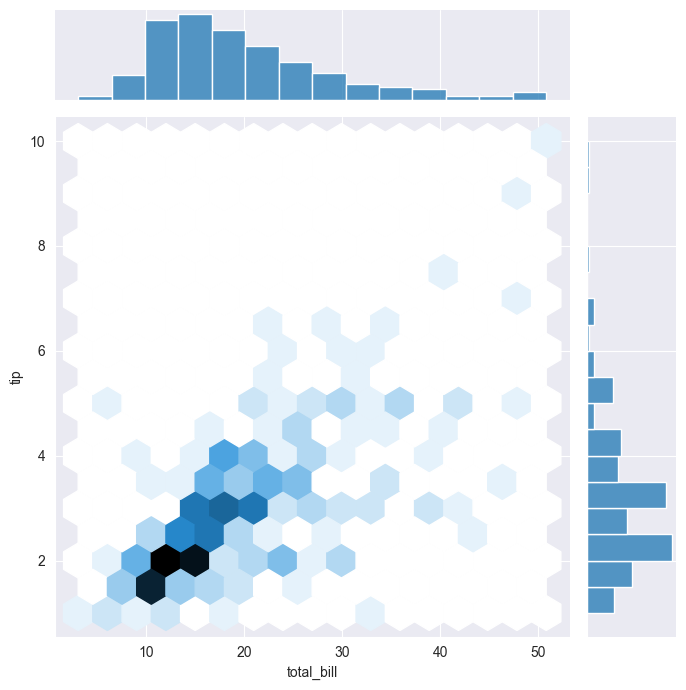

In [64]:
# kind='hex': hexbin모양으로 그래프 그려줌
sns.jointplot(x='total_bill', y='tip', height=7, data=tips, kind='hex')
plt.show()

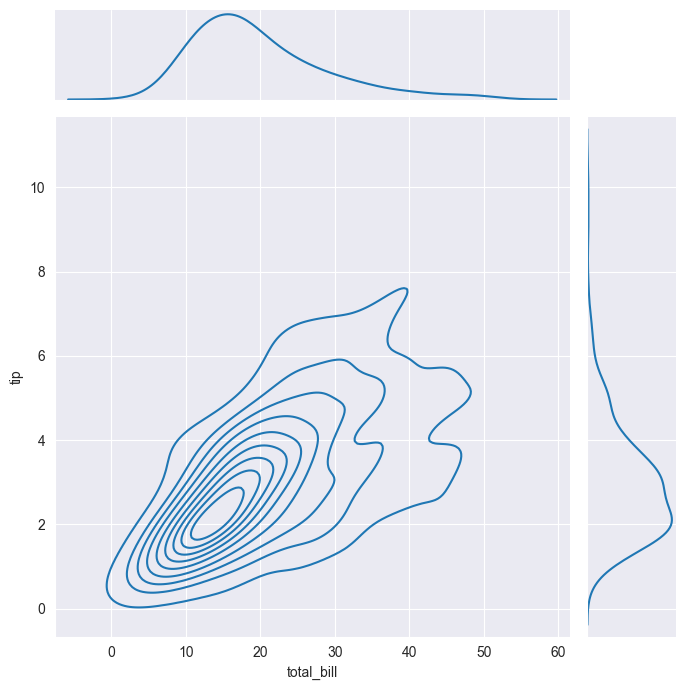

In [65]:
# kind='kde': 데이터의 밀집도 확인가능
sns.jointplot(x='total_bill', y='tip', height=7, data=tips, kind='kde')
plt.show()

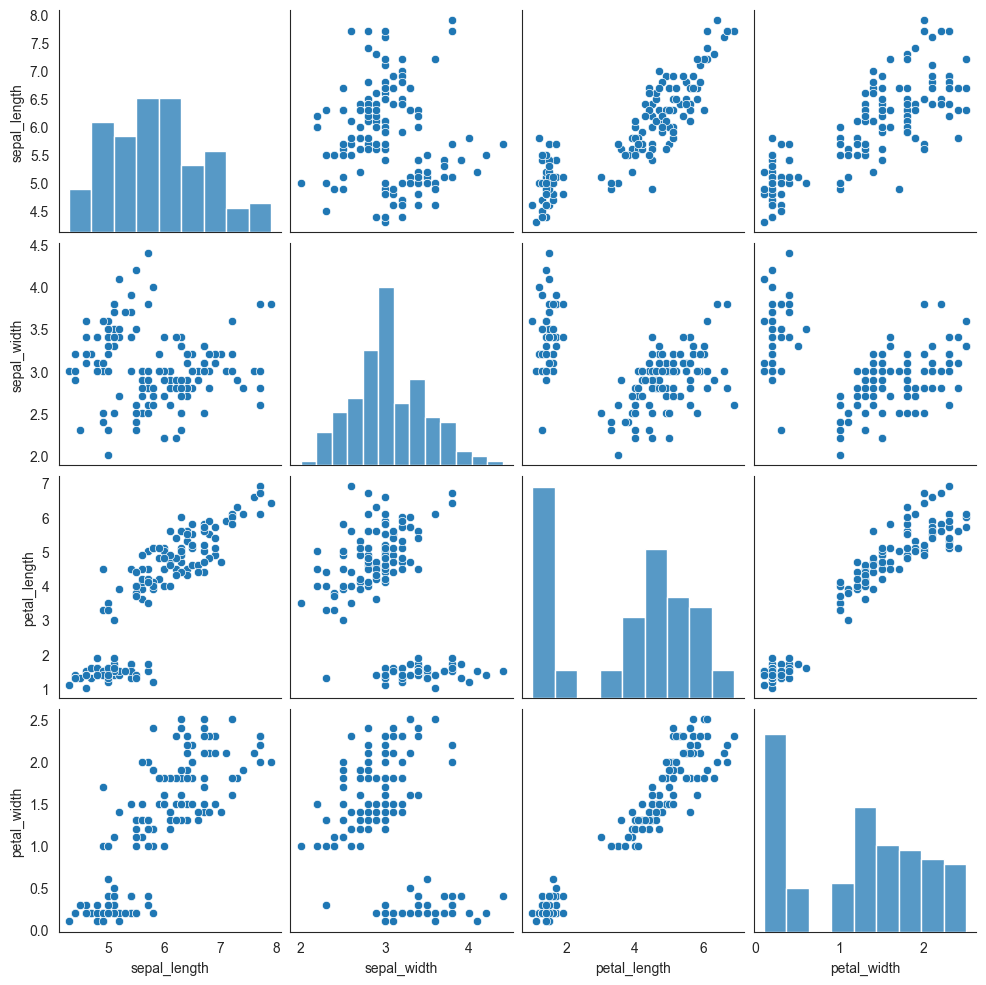

In [68]:
#pairplot: 각 컬럼의 집합들의 모든 조합에 대한 히스토그램과 분포도
iris = sns.load_dataset('iris')
sns.pairplot(iris)
plt.show()

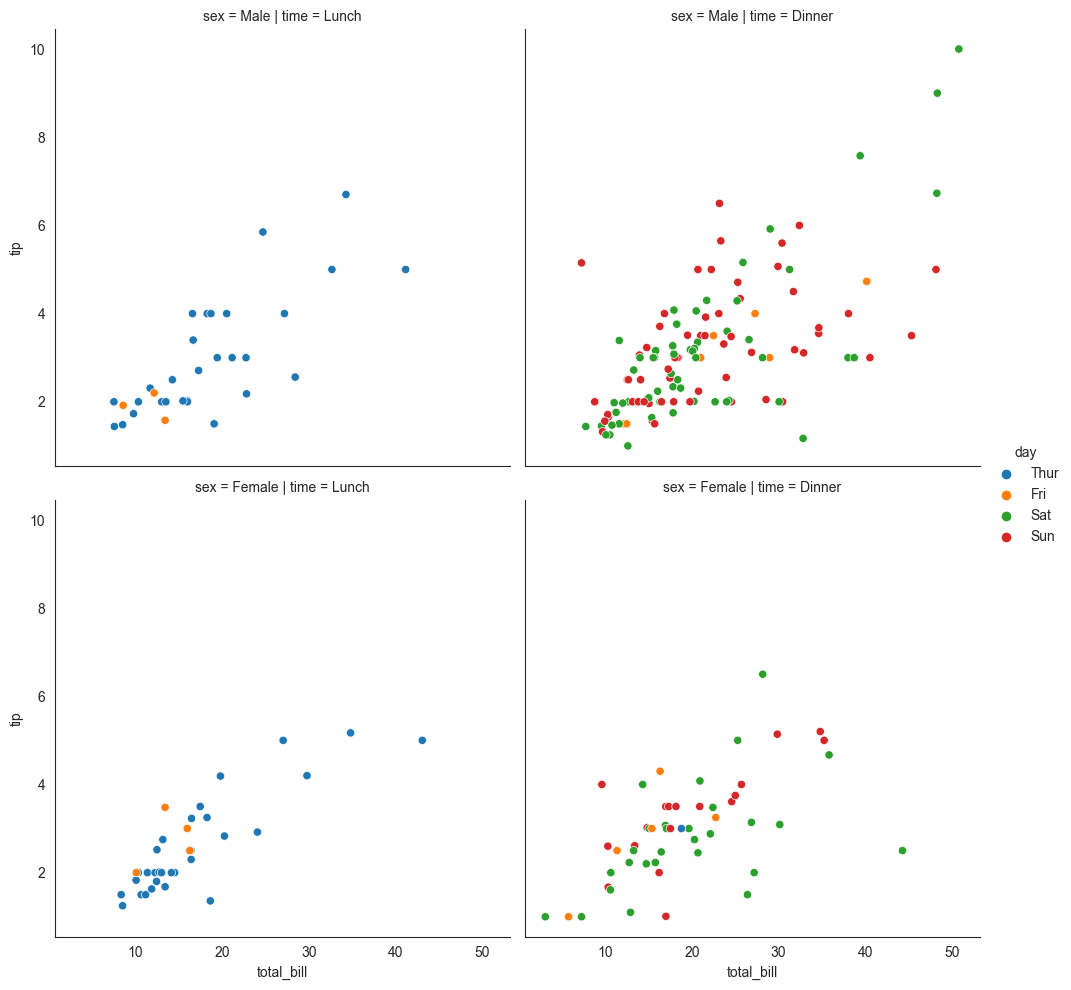

In [69]:
#relplot: 두 컬럼간 상관관계를 보지만, lmplot처럼 선형관계를 따로 그려주지 않음
#hue: 비교 변수(day), 행(sex)별 열(time)별 그래프 분할해서 그림 
sns.relplot(x="total_bill", y="tip", hue="day", row="sex", col="time", height=5, data=tips)
plt.show()

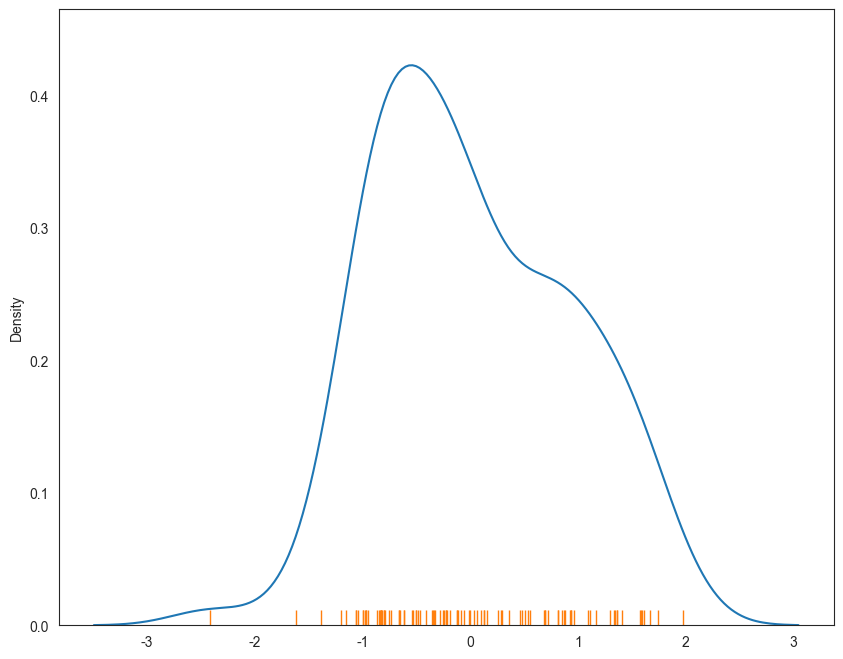

In [71]:
#rugplot
sns.kdeplot(x=x)
sns.rugplot(x=x)
plt.show()

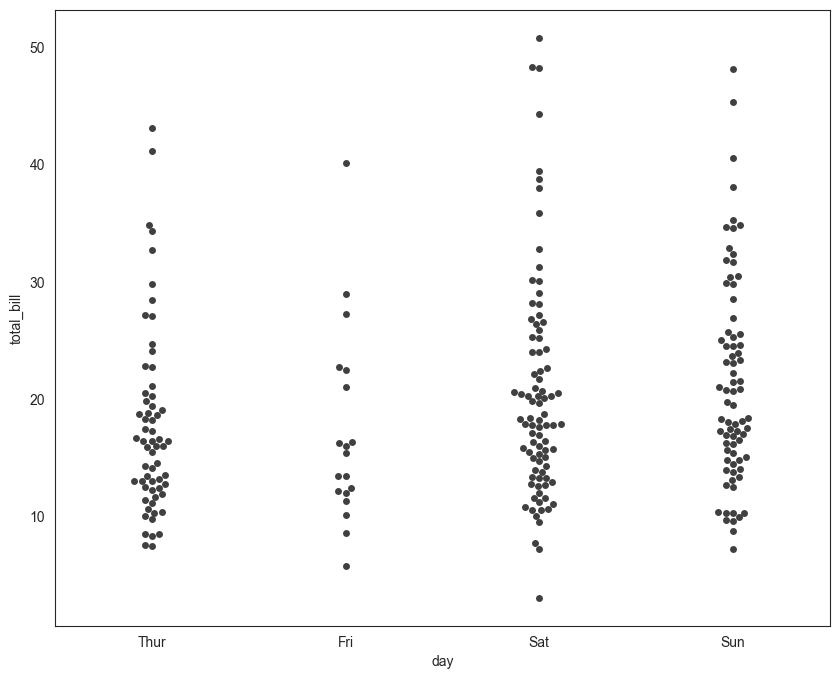

In [74]:
#swarm plot: 범주형 데이터분포를 시각화(차이 확인가능), 데이터포인트를 가장 밀집된 곳에 모음
sns.swarmplot(x='day', y='total_bill', data=tips, color='.25')
plt.show()

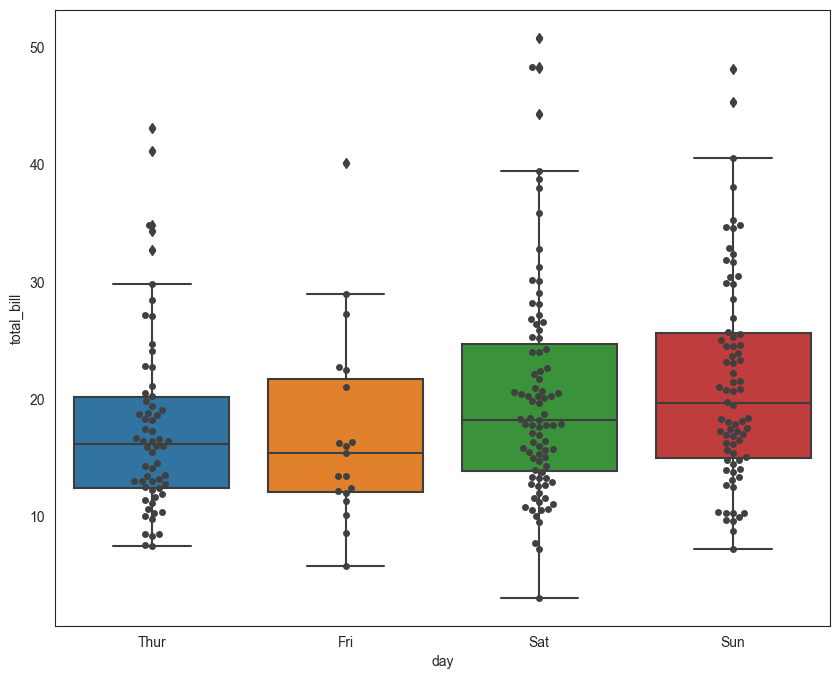

In [75]:
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='.25')
plt.show()

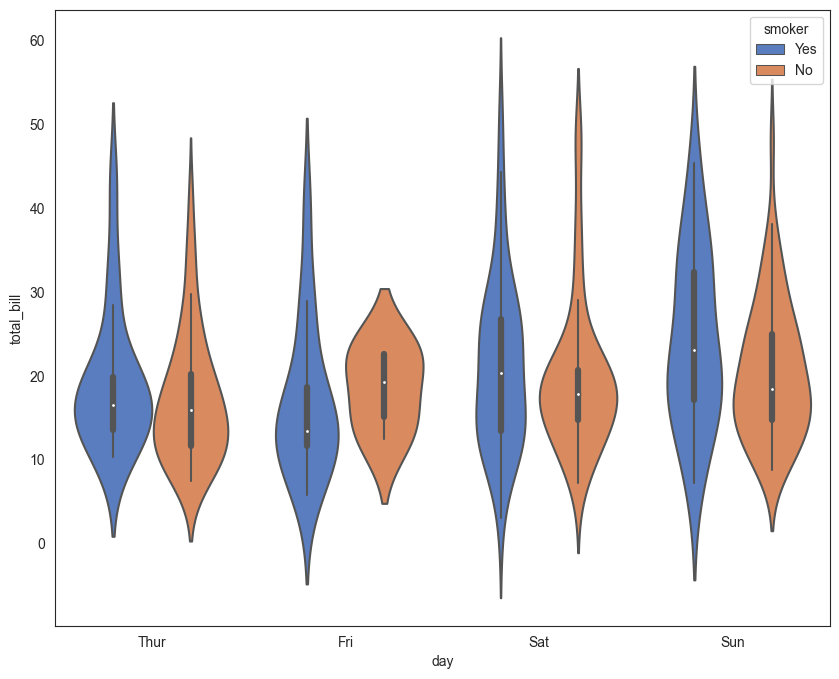

In [82]:
#violinplot: 컬럼에 대한 데이터의 비교 분포도를 확인
#비교하려면 hue옵션(행렬로 비교해주는 것)이 꼭 있어야함  

sns.violinplot(x="day", y="total_bill", hue="smoker",  data=tips, palette="muted")
plt.show()

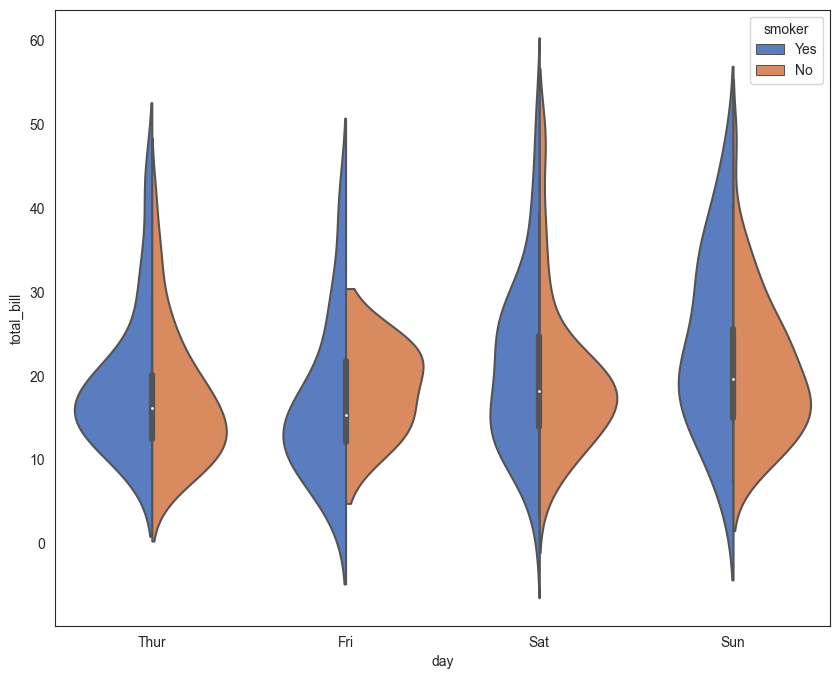

In [83]:
#split=True: 바이올린을 양쪽에서 나눠서 보기
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="muted", split=True)
plt.show()

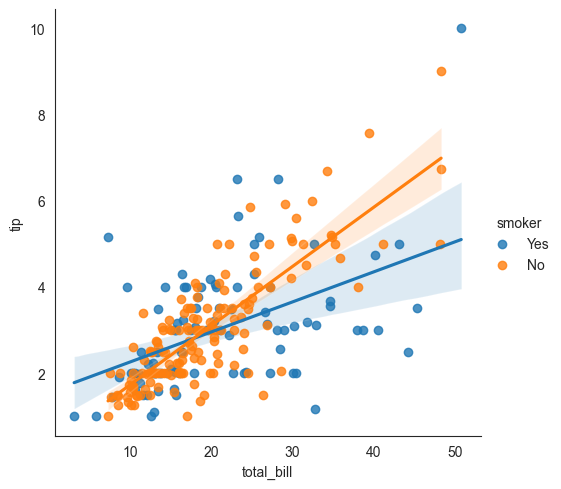

In [85]:
#hue옵션으로 여러개의 선형관계를 비교할 수 있음
sns.lmplot(x="total_bill", y="tip", hue='smoker',height=5, data=tips)
#비흡연자가 흡연자 대비 더 가파른 선형관계를 가진다 
plt.show()

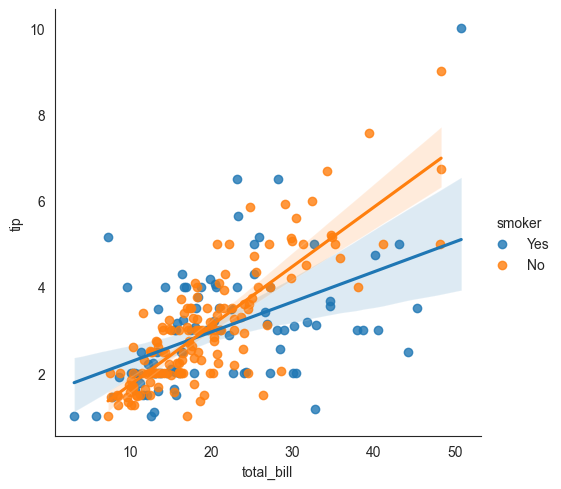

In [89]:
sns.lmplot(x="total_bill", y="tip", hue='smoker', height=5, data=tips)
plt.show()

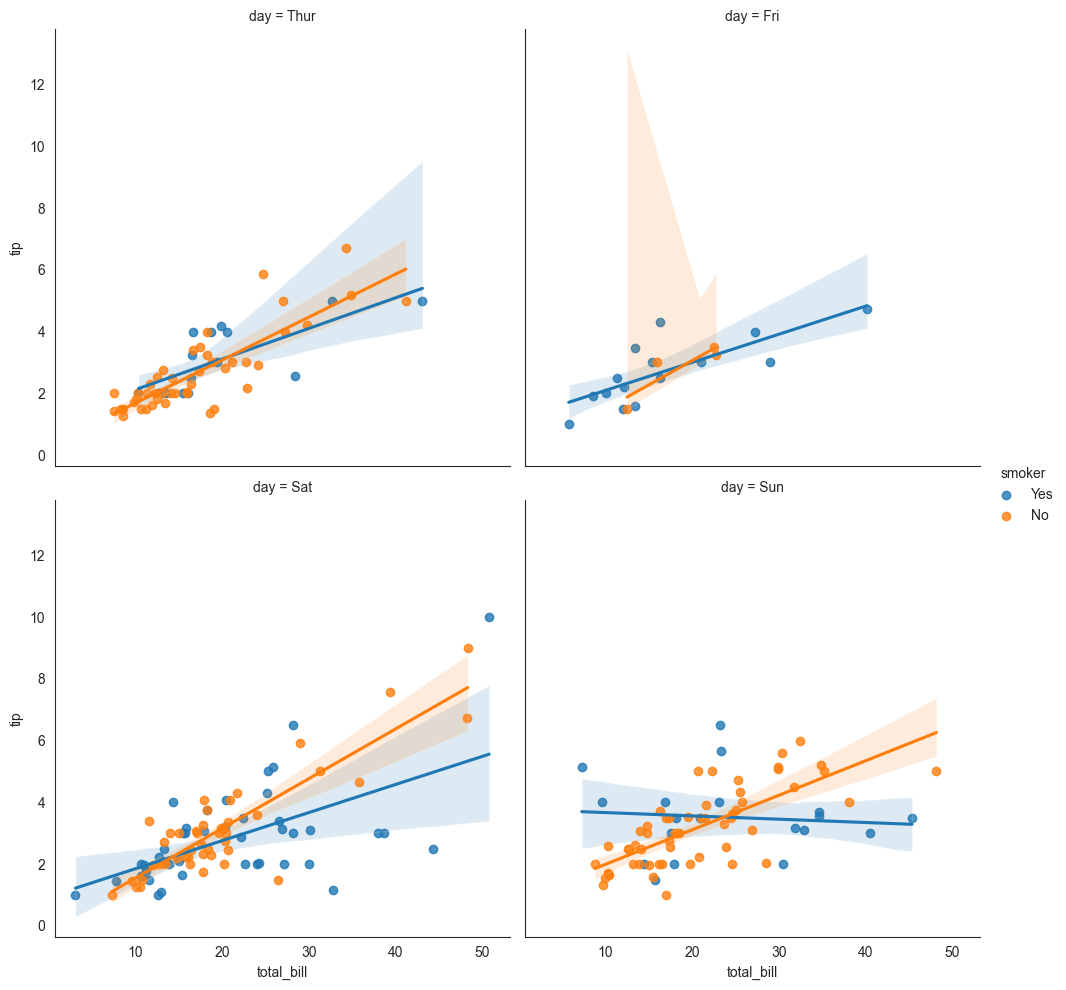

In [91]:
sns.lmplot(x="total_bill", y="tip",col='day', col_wrap=2, hue='smoker', height=5, data=tips)
plt.show()